In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

### Beam parameters

In [12]:
# number of sampling points
N = 2048
# photon energy in eV
E0 = 9000

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'rangeFactor': 5,
    'scaleFactor': 10,
    'z_source': 630
}

### Define beamline

In [102]:
# crystal asymmetry angle
alphaAsym = 7.7*np.pi/180

# distance between crystal 2 and 1st CRL, 2nd CRL and crystal 4 
f1 = .9
# distance between CRLs and focus
f2 = 1.1

# initialize the beam
b1 = beam.Beam(beam_params=beam_params)

# viewing point upstream of monochromator
im0 = optics.PPM('im0', z=789.9, FOV=2e-3, N=256)

# first crystal: symmetric reflection
crystal1 = optics.Crystal('c1', hkl=[1,1,1], length=1e-2, width=20e-3, z=790, E0=E0,
                          alphaAsym=0, orientation=0, pol='p')

# second crystal: asymmetric reflection, orientation flipped relative to crystal1
crystal2 = optics.Crystal('c2', hkl=[1,1,1], length=1e-2, width=20e-3, z=790.1, E0=E0,alphaAsym=alphaAsym, 
                          orientation=2,pol='p')
# printing crystal incidence and reflection angles for confirmation
print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

# CRL with ~1 meter focal length (modeled as single element for now)
crl1 = optics.CRL('crl1', z=crystal2.z+f1, roc=8.43e-6, diameter=5e-3)

# viewing point downstream of first crl
im1 = optics.PPM('im1', z=crl1.z+.1,N=256,FOV=2e-3)

# viewing point at focus
focus = optics.PPM('focus', z=crl1.z+f2, FOV=100e-6, N=256)

# slit at focus
slit = optics.Slit('slit', z=crl1.z+f2 + 1e-3, x_width=1e-6, y_width=2e-3)

# second CRL with ~1 meter focal length, for collimation
crl2 = optics.CRL('crl2', z=focus.z+f2, roc=8.43e-6, diameter=5e-3)

# third crystal, symmetric reflection, same orientation as crystal2
crystal3 = optics.Crystal('c3', hkl=[1,1,1], length=1e-2, width=10e-3, z=crl2.z+.15, E0=E0,alphaAsym=0, orientation=2,
                         asym_type='emergence',pol='p')

# fourth crystal, asymmetric reflection, same orientation as crystal1
crystal4 = optics.Crystal('c4', hkl=[1,1,1], length=1e-2, width=10e-3, z=crl2.z+f1, E0=E0,alphaAsym=-alphaAsym, 
                          asym_type='emergence', orientation=0,pol='p')

# viewing point just downstream of monochromator
im2 = optics.PPM('im2', z=crystal4.z+.1, FOV=2e-3, N=256)

# list of devices to propagate through
devices = [im0,crystal1,crystal2,im1, crl1, focus, crl2, crystal3, crystal4, im2]

# initialize beamline
mono_beamline = beamline.Beamline(devices)

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131781317485263
5.131781317485263
x is focused
y is focused
b 1.00
b 4.00
crystal 2 incidence angle: 20.39 degrees
crystal 2 exit angle: 5.00 degrees
b 1.00
b 0.25
after c1: 0.44
after c2: -0.00
after c3: -0.44
after c4: -0.00


### Propagation through monochromator at central photon energy

FWHM in x: 551.7942065882002 microns
FWHM in y: 551.7942065882002 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131781317485263
5.131781317485263
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.008672
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.01
zx: 10.908672
zy: 161.010686
azimuth -0.12 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103474
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003474
zy: 161.110686
azimuth -0.06 mrad
im1
zx: -1.003474
zy: 161.110686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains fo

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


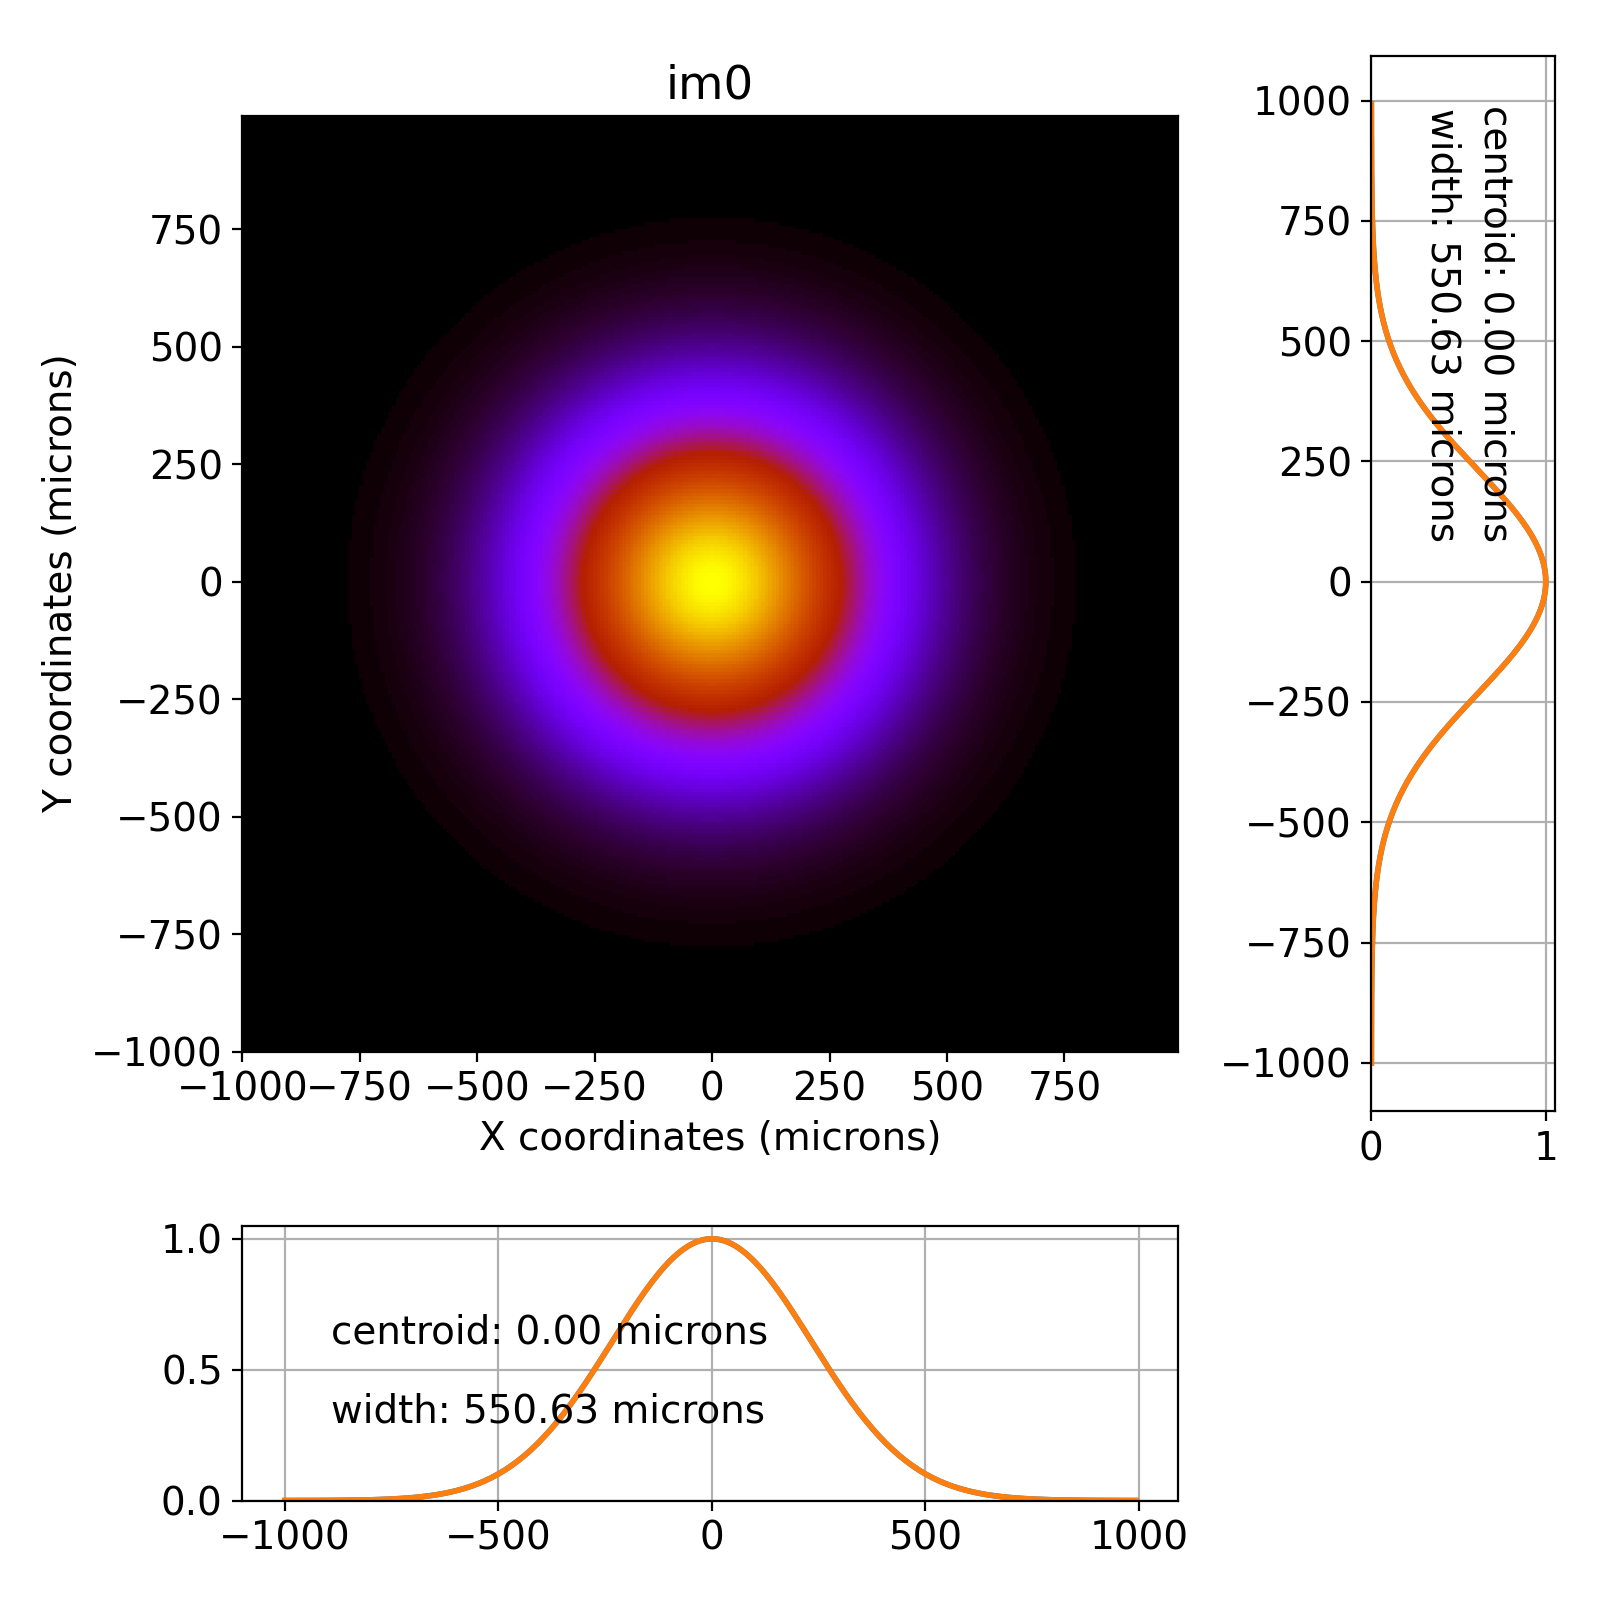

<IPython.core.display.Javascript object>


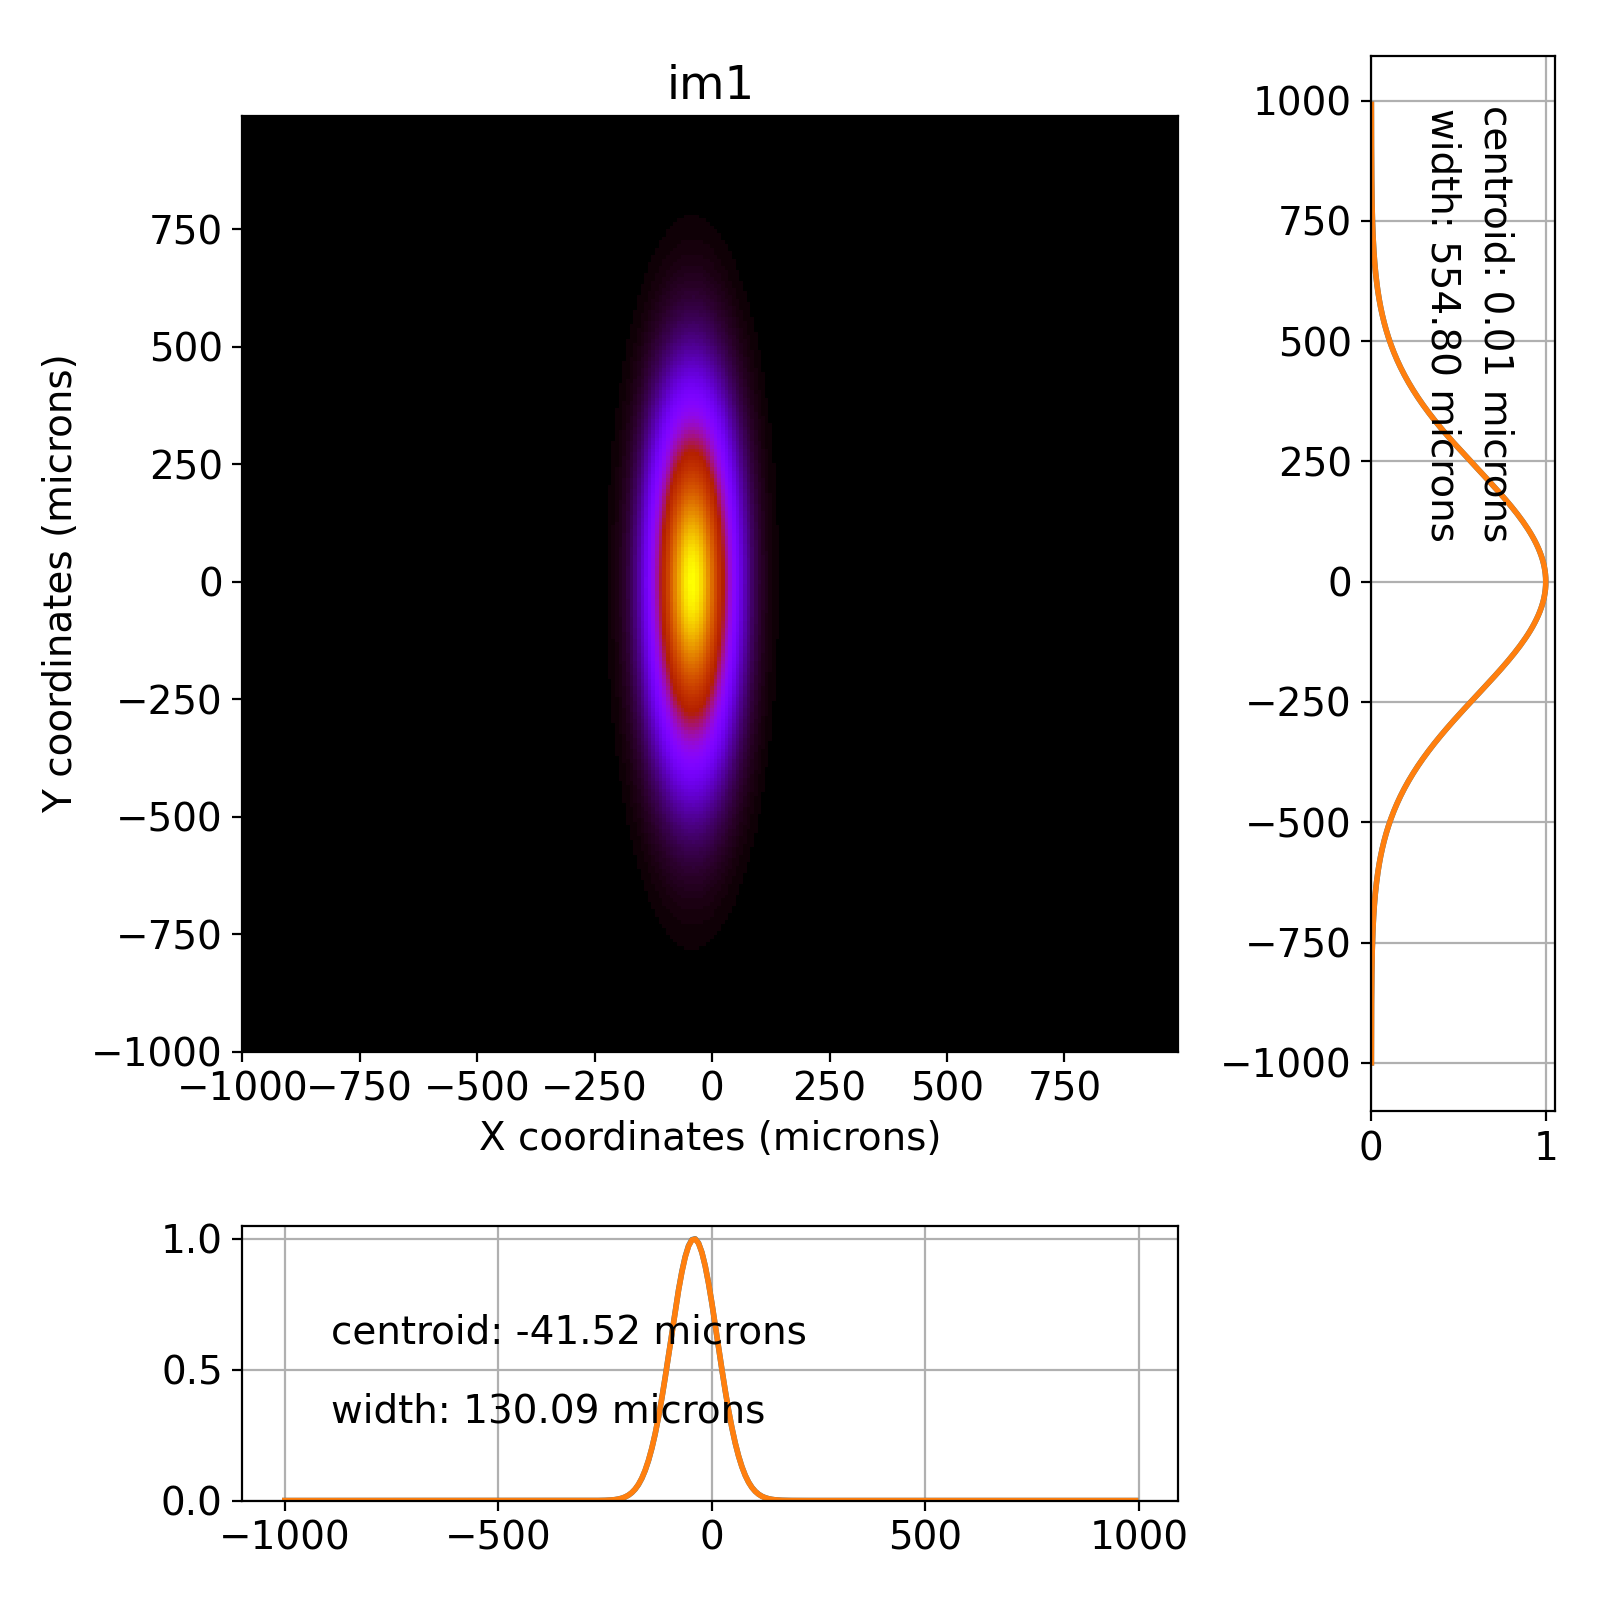

<IPython.core.display.Javascript object>


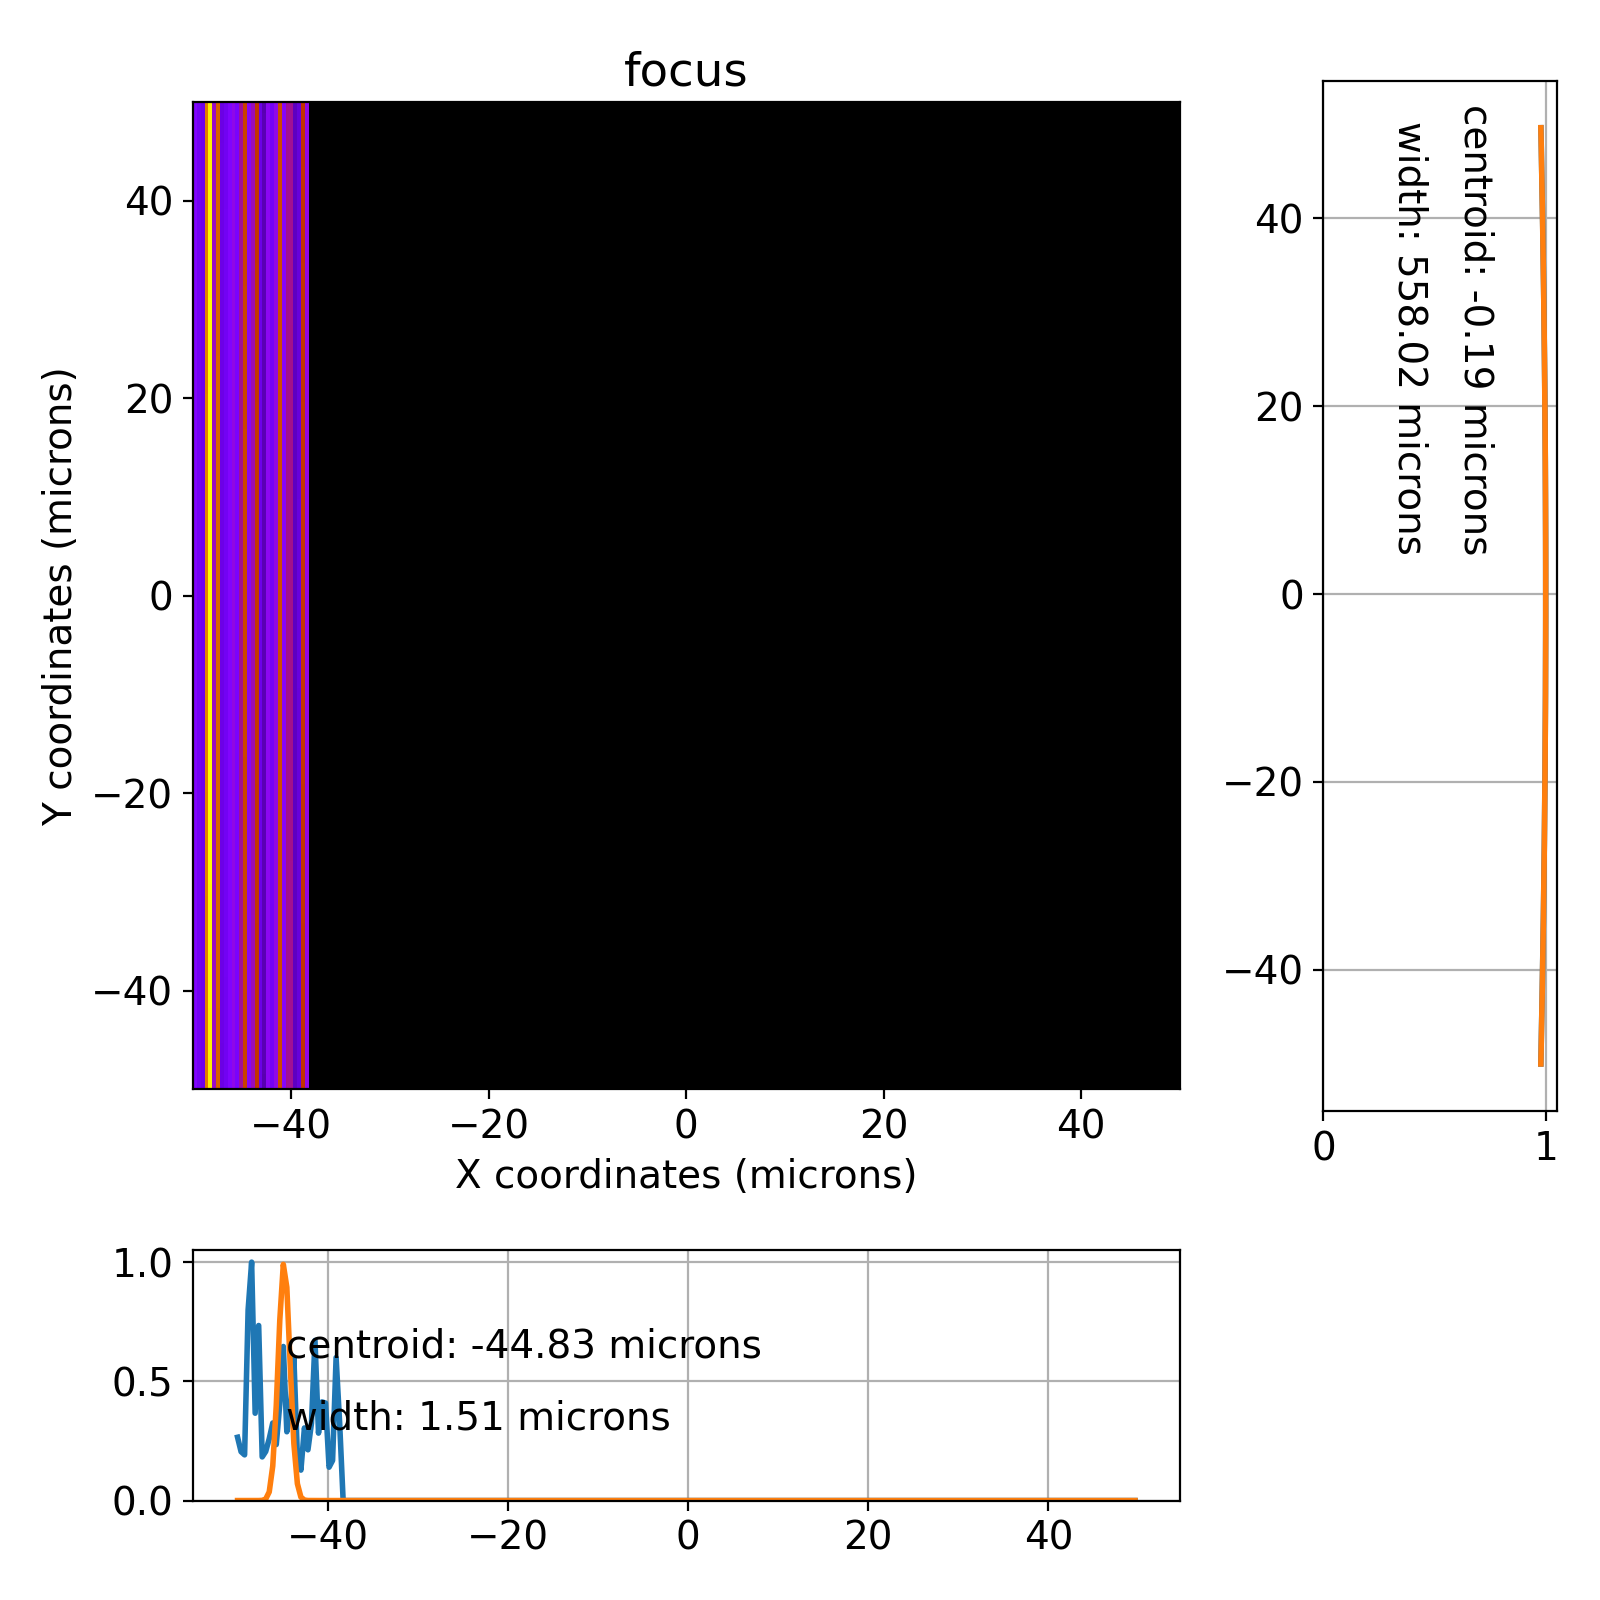

<IPython.core.display.Javascript object>


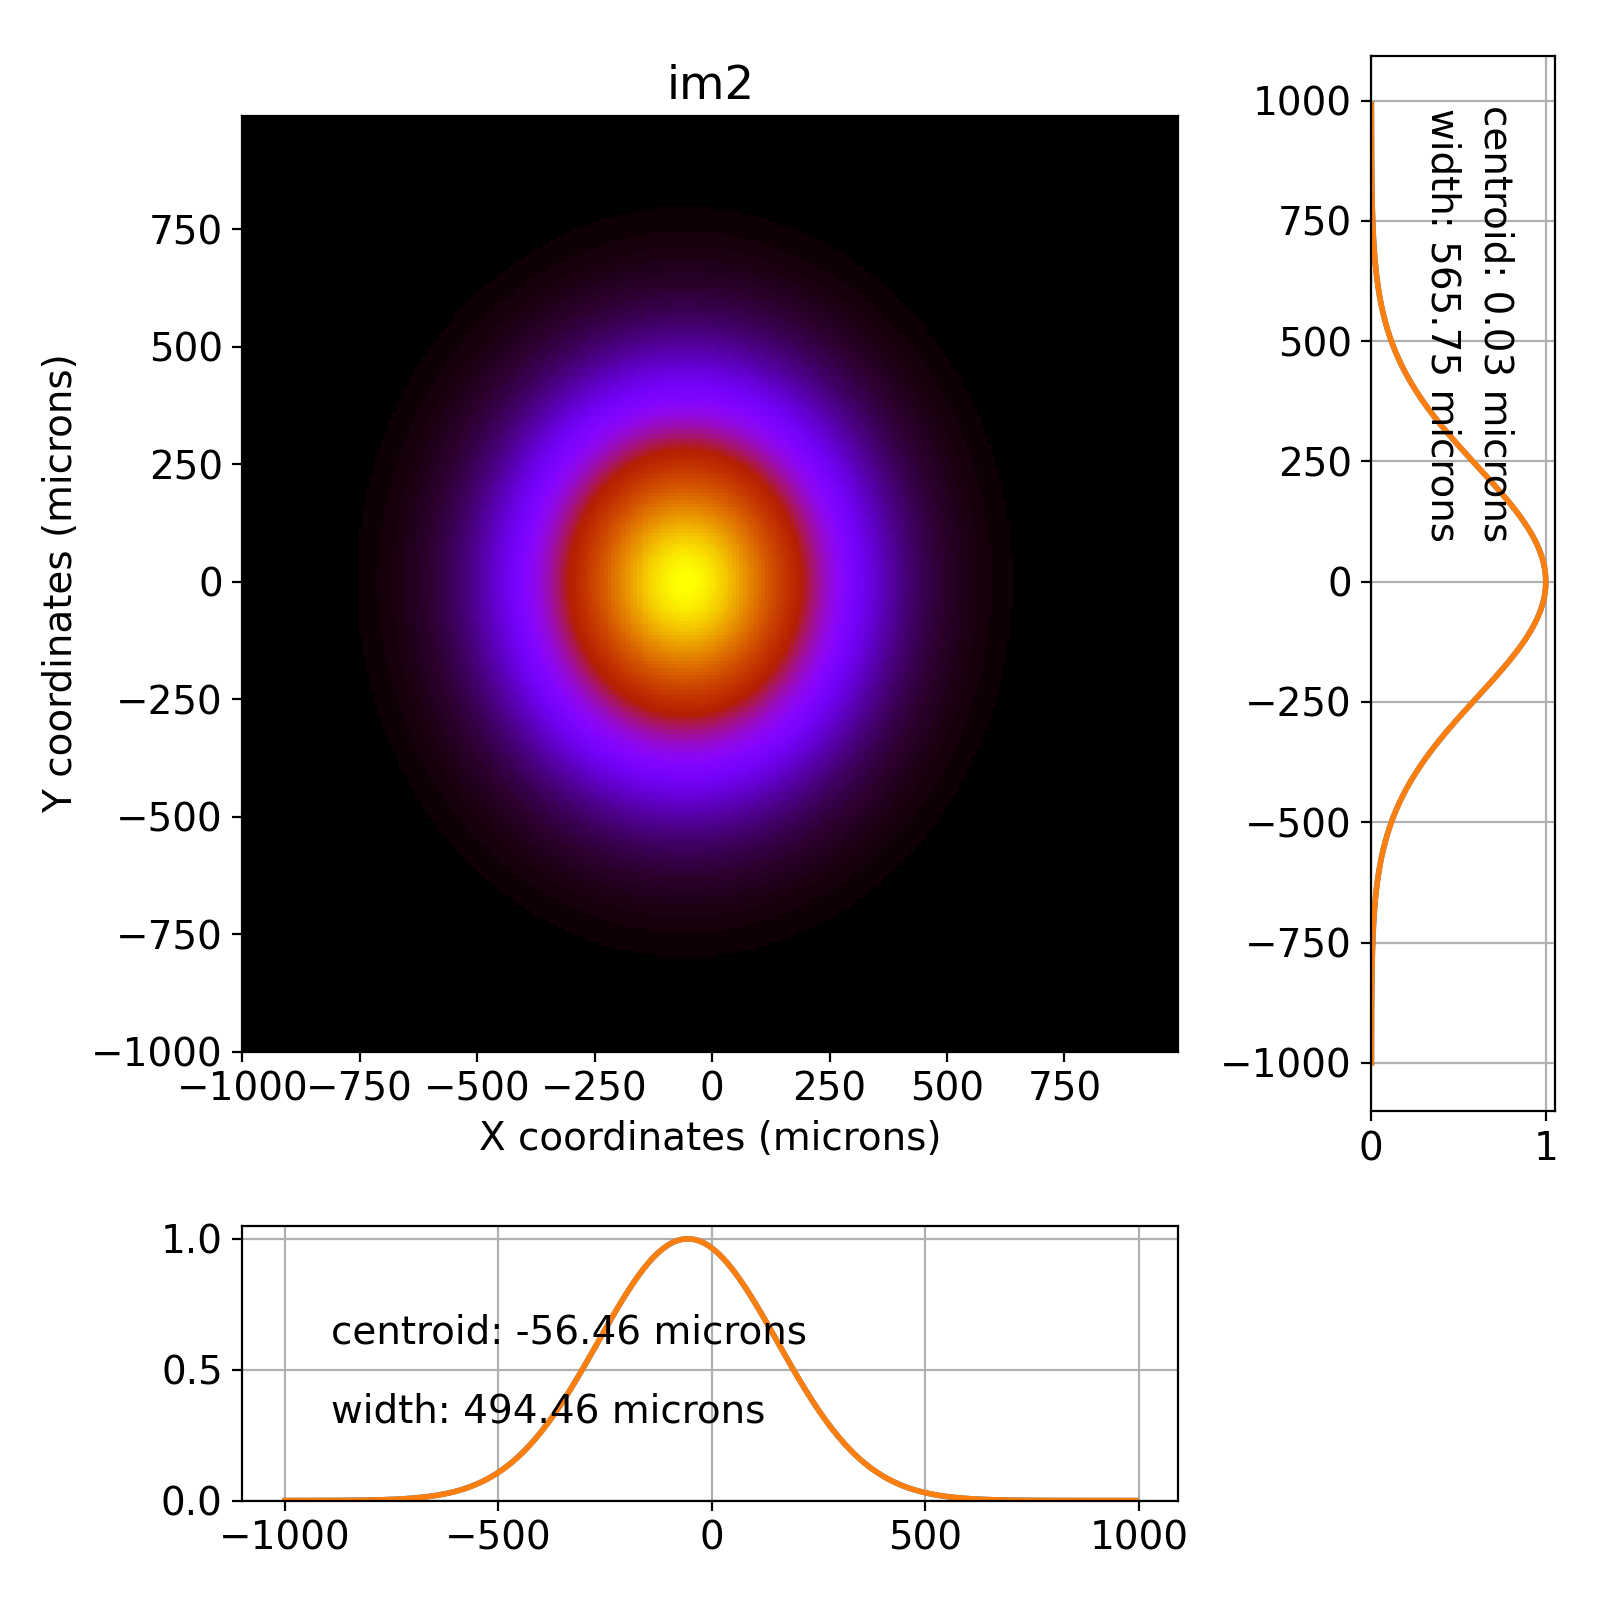

In [103]:
# propagate
b2 = mono_beamline.propagate_beamline(b1)

# view beam at various locations
mono_beamline.im0.view_beam()
mono_beamline.im1.view_beam()
mono_beamline.focus.view_beam()
mono_beamline.im2.view_beam()

## Time-domain propagation

In [104]:
# reset central photon energy
beam_params['photonEnergy'] = 9000

# initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
pulse = beam.Pulse(beam_params=beam_params, tau=5, time_window=1000)

print('Number of spectral components: {:d}'.format(pulse.N))

Number of spectral components: 449


In [105]:
# propagate pulse through beamline. This will take a minute or so (depends on number of spectral 
# components which is proportional to the ratio time_window/tau).
pulse.propagate(beamline=mono_beamline, screen_names=['im0','focus','im2'])

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130720898225868
5.130720898225868
x is focused
y is focused
FWHM in x: 551.9081342813263 microns
FWHM in y: 551.9081342813263 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130720898225868
5.130720898225868
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.992689
zy: 160.110686
azimuth 0.02 mrad
drift3
delta z: -0.01
zx: 10.892689
zy: 161.010686
azimuth 0.02 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103167
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: -0.00
zx: -1.0

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130723265233144
5.130723265233144
x is focused
y is focused
FWHM in x: 551.9078799259707 microns
FWHM in y: 551.9078799259707 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130723265233144
5.130723265233144
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.992725
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.892725
zy: 161.010686
azimuth 0.01 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103167
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.00

zx: -1.003171
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003171
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003171
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003171
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096829
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.552615
zy: 163.210686
azimuth -0.12 mrad
drift7
delta z: 1.35
zx: -11.402907
zy: 163.360394
azimuth -0.12 mrad
c3
Calculated distance to focus: 11.402907
zRx: 3.36e+00
zRy: 4.72e+01
zx: -11.405821
zy: 163.360394
azimuth -443.02 mrad
drift8
delta z: -0.65
zx: -10.575513
zy: 164.190702
azimuth -443.02 mrad
c4
Calculated distance to focus: 169.396960
zRx: 5.37e+01
zRy: 4.72e+01
zx: -169.642807
zy: 164.190702
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.542666
zy: 164.290844
azimuth -0.03 mrad
im2

zx: -169.552917
zy: 164.290844
azimuth -0.03 mrad
im2
zx: -169.552917
zy: 164.290844
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1307540363277235
5.1307540363277235
x is focused
y is focused
FWHM in x: 551.9045733277171 microns
FWHM in y: 551.9045733277171 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1307540363277235
5.1307540363277235
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.993190
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.893190
zy: 161.010686
azimuth 0.01 mrad
crl1
zRx: 3.02e-02
zRy

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.993405
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.893405
zy: 161.010686
azimuth 0.01 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103180
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003180
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003180
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003180
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003180
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096820
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.555102
zy: 163.210686
azimuth -0.12 mrad
drift7
delta z: 1.35
zx: -11.405376
zy: 163.360412
azimuth -0.12 mrad
c3
Calculated distance to focus: 1

zx: 1.096816
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.556250
zy: 163.210686
azimuth -0.12 mrad
drift7
delta z: 1.35
zx: -11.406516
zy: 163.360420
azimuth -0.12 mrad
c3
Calculated distance to focus: 11.406516
zRx: 3.36e+00
zRy: 4.72e+01
zx: -11.409176
zy: 163.360420
azimuth -443.03 mrad
drift8
delta z: -0.65
zx: -10.578880
zy: 164.190716
azimuth -443.03 mrad
c4
Calculated distance to focus: 169.450901
zRx: 5.38e+01
zRy: 4.72e+01
zx: -169.675268
zy: 164.190716
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.575139
zy: 164.290845
azimuth -0.03 mrad
im2
zx: -169.575139
zy: 164.290845
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130784807422304
5.130784807422304
x is focused
y is focused
FWHM in x: 551.9012667691452 microns
FWHM in y: 551.9012667691452 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13078

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130799009465957
5.130799009465957
x is focused
y is focused
FWHM in x: 551.8997406785727 microns
FWHM in y: 551.8997406785727 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130799009465957
5.130799009465957
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.993869
zy: 160.110686
azimuth 0.00 mrad
drift3
delta z: -0.00
zx: 10.893869
zy: 161.010686
azimuth 0.00 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103189
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.00

zRx: 5.38e+01
zRy: 4.72e+01
zx: -169.695786
zy: 164.190724
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.595664
zy: 164.290845
azimuth -0.03 mrad
im2
zx: -169.595664
zy: 164.290845
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13081321150961
5.13081321150961
x is focused
y is focused
FWHM in x: 551.898214596453 microns
FWHM in y: 551.898214596453 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13081321150961
5.13081321150961
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.994084
zy: 160.110686
azimuth 0.00 mrad
d

zx: -169.605931
zy: 164.290846
azimuth -0.03 mrad
im2
zx: -169.605931
zy: 164.290846
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130827413553263
5.130827413553263
x is focused
y is focused
FWHM in x: 551.8966885227859 microns
FWHM in y: 551.8966885227859 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130827413553263
5.130827413553263
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.994299
zy: 160.110686
azimuth 0.00 mrad
drift3
delta z: -0.00
zx: 10.894299
zy: 161.010686
azimuth 0.00 mrad
crl1
zRx: 3.02e-02
zRy: 4.

delta z: 0.00
zx: -1.003201
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003201
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003201
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003201
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096799
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.560846
zy: 163.210686
azimuth -0.11 mrad
drift7
delta z: 1.35
zx: -11.411080
zy: 163.360452
azimuth -0.11 mrad
c3
Calculated distance to focus: 11.411080
zRx: 3.36e+00
zRy: 4.72e+01
zx: -11.413418
zy: 163.360452
azimuth -443.04 mrad
drift8
delta z: -0.65
zx: -10.583138
zy: 164.190732
azimuth -443.04 mrad
c4
Calculated distance to focus: 169.519093
zRx: 5.38e+01
zRy: 4.72e+01
zx: -169.716315
zy: 164.190732
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.616202
zy: 164.290846
azimuth -0.03 mrad
im2
zx: -169.616202
zy: 1

focal length: 1.00
zx: -11.561995
zy: 163.210686
azimuth -0.11 mrad
drift7
delta z: 1.35
zx: -11.412221
zy: 163.360460
azimuth -0.11 mrad
c3
Calculated distance to focus: 11.412221
zRx: 3.36e+00
zRy: 4.72e+01
zx: -11.414479
zy: 163.360460
azimuth -443.04 mrad
drift8
delta z: -0.65
zx: -10.584202
zy: 164.190736
azimuth -443.04 mrad
c4
Calculated distance to focus: 169.536151
zRx: 5.38e+01
zRy: 4.72e+01
zx: -169.726585
zy: 164.190736
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.626475
zy: 164.290846
azimuth -0.03 mrad
im2
zx: -169.626475
zy: 164.290846
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130855817640567
5.130855817640567
x is focused
y is focused
FWHM in x: 551.8936364008096 microns
FWHM in y: 551.8936364008096 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130855817640567
5.130855817640567
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad

zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.994942
zy: 160.110686
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 10.894942
zy: 161.010686
azimuth -0.00 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103210
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003210
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003210
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003210
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003210
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096790
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.563337
zy: 163.210686
azimuth -0.11 mrad
drift7
delta z: 1.34
zx: -11.413553
zy: 163.360470
azimuth -0.11 mrad
c3
Calculated distance to focus: 11.413553
zRx: 3.36e+00
zRy: 4.72e+01
zx: -11.415717
zy: 163.360470
azimuth -443.04 mrad
drift

delta z: 0.00
zx: -1.003214
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003214
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003214
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003214
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096786
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.564487
zy: 163.210686
azimuth -0.10 mrad
drift7
delta z: 1.34
zx: -11.414695
zy: 163.360478
azimuth -0.10 mrad
c3
Calculated distance to focus: 11.414695
zRx: 3.36e+00
zRy: 4.72e+01
zx: -11.416778
zy: 163.360478
azimuth -443.04 mrad
drift8
delta z: -0.65
zx: -10.586511
zy: 164.190745
azimuth -443.04 mrad
c4
Calculated distance to focus: 169.573124
zRx: 5.38e+01
zRy: 4.72e+01
zx: -169.748846
zy: 164.190745
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.648745
zy: 164.290847
azimuth 

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130898423771526
5.130898423771526
x is focused
y is focused
FWHM in x: 551.8890582812382 microns
FWHM in y: 551.8890582812382 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130898423771526
5.130898423771526
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.995371
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.895371
zy: 161.010686
azimuth -0.01 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103218
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.0

FWHM in x: 551.8875322582858 microns
FWHM in y: 551.8875322582858 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130912625815178
5.130912625815178
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.995585
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.895585
zy: 161.010686
azimuth -0.01 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103222
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003222
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003222
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains foc

Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.995800
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.895800
zy: 161.010686
azimuth -0.01 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103226
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003226
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003226
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003226
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003226
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096774
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.567

zx: -1.003230
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003230
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003230
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003230
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096770
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.569090
zy: 163.210686
azimuth -0.10 mrad
drift7
delta z: 1.34
zx: -11.419266
zy: 163.360510
azimuth -0.10 mrad
c3
Calculated distance to focus: 11.419266
zRx: 3.36e+00
zRy: 4.72e+01
zx: -11.421027
zy: 163.360510
azimuth -443.05 mrad
drift8
delta z: -0.65
zx: -10.590775
zy: 164.190762
azimuth -443.05 mrad
c4
Calculated distance to focus: 169.641430
zRx: 5.38e+01
zRy: 4.72e+01
zx: -169.789982
zy: 164.190762
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.689897
zy: 164.290848
azimuth -0.03 mrad
im2
zx: -169.689897
zy: 164.290848
azim

zx: 1.096766
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.36e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.570241
zy: 163.210686
azimuth -0.09 mrad
drift7
delta z: 1.34
zx: -11.420409
zy: 163.360518
azimuth -0.09 mrad
c3
Calculated distance to focus: 11.420409
zRx: 3.37e+00
zRy: 4.72e+01
zx: -11.422090
zy: 163.360518
azimuth -443.05 mrad
drift8
delta z: -0.65
zx: -10.591842
zy: 164.190766
azimuth -443.05 mrad
c4
Calculated distance to focus: 169.658516
zRx: 5.38e+01
zRy: 4.72e+01
zx: -169.800274
zy: 164.190766
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.700192
zy: 164.290848
azimuth -0.03 mrad
im2
zx: -169.700192
zy: 164.290848
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130957598953412
5.130957598953412
x is focused
y is focused
FWHM in x: 551.8826999080303 microns
FWHM in y: 551.8826999080303 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13095

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130971800997065
5.130971800997065
x is focused
y is focused
FWHM in x: 551.8811739202948 microns
FWHM in y: 551.8811739202948 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130971800997065
5.130971800997065
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.996479
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.896479
zy: 161.010686
azimuth -0.02 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103239
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.0

Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.996693
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.896693
zy: 161.010686
azimuth -0.02 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103243
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003243
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003243
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003243
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003243
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096757
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.37e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.572737
zy: 163.210686
azimuth -0.09 mra

x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003247
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003247
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096753
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.37e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.573889
zy: 163.210686
azimuth -0.09 mrad
drift7
delta z: 1.34
zx: -11.424031
zy: 163.360544
azimuth -0.09 mrad
c3
Calculated distance to focus: 11.424031
zRx: 3.37e+00
zRy: 4.72e+01
zx: -11.425457
zy: 163.360544
azimuth -443.06 mrad
drift8
delta z: -0.65
zx: -10.595221
zy: 164.190779
azimuth -443.06 mrad
c4
Calculated distance to focus: 169.712649
zRx: 5.39e+01
zRy: 4.72e+01
zx: -169.832885
zy: 164.190779
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.732815
zy: 164.290849
azimuth -0.03 mrad
im2
zx: -169.732815
zy: 164.290849
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad


Calculated distance to focus: 11.425176
zRx: 3.37e+00
zRy: 4.72e+01
zx: -11.426521
zy: 163.360552
azimuth -443.06 mrad
drift8
delta z: -0.65
zx: -10.596289
zy: 164.190784
azimuth -443.06 mrad
c4
Calculated distance to focus: 169.729752
zRx: 5.39e+01
zRy: 4.72e+01
zx: -169.843189
zy: 164.190784
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.743124
zy: 164.290849
azimuth -0.03 mrad
im2
zx: -169.743124
zy: 164.290849
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131016774135298
5.131016774135298
x is focused
y is focused
FWHM in x: 551.8763416815581 microns
FWHM in y: 551.8763416815581 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131016774135298
5.131016774135298
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+0

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131030976178949
5.131030976178949
x is focused
y is focused
FWHM in x: 551.8748157290385 microns
FWHM in y: 551.8748157290385 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131030976178949
5.131030976178949
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.997372
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.897372
zy: 161.010686
azimuth -0.03 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103256
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.0

Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.997586
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.897586
zy: 161.010686
azimuth -0.03 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103261
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003261
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003261
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003260
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003260
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096740
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.37e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.577539
zy: 163.210686
azimuth -0.08 mrad
drift7
delta z: 1.34
zx: -11.427656
zy: 163.360569
azimuth -0.08 mrad
c3
Calculated distance to focus: 11.427656
zRx: 3.37e+00
zRy: 4.72e+01
zx: -11.428827


zx: 1.096735
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.37e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.578693
zy: 163.210686
azimuth -0.08 mrad
drift7
delta z: 1.34
zx: -11.428802
zy: 163.360577
azimuth -0.08 mrad
c3
Calculated distance to focus: 11.428802
zRx: 3.37e+00
zRy: 4.72e+01
zx: -11.429892
zy: 163.360577
azimuth -443.06 mrad
drift8
delta z: -0.65
zx: -10.599672
zy: 164.190797
azimuth -443.06 mrad
c4
Calculated distance to focus: 169.783938
zRx: 5.39e+01
zRy: 4.72e+01
zx: -169.875841
zy: 164.190797
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.775788
zy: 164.290850
azimuth -0.03 mrad
im2
zx: -169.775788
zy: 164.290850
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13106174727353
5.13106174727353
x is focused
y is focused
FWHM in x: 551.8715095275728 microns
FWHM in y: 551.8715095275728 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1310617

zx: -169.786109
zy: 164.290850
azimuth -0.03 mrad
im2
zx: -169.786109
zy: 164.290850
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131075949317183
5.131075949317183
x is focused
y is focused
FWHM in x: 551.8699836018163 microns
FWHM in y: 551.8699836018163 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131075949317183
5.131075949317183
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.998050
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.898050
zy: 161.010686
azimuth -0.03 mrad
crl1
zRx: 3.02e-02
zRy: 4

zx: 10.898264
zy: 161.010686
azimuth -0.03 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103274
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003274
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003274
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003274
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003274
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096726
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.37e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.581192
zy: 163.210686
azimuth -0.08 mrad
drift7
delta z: 1.34
zx: -11.431284
zy: 163.360595
azimuth -0.08 mrad
c3
Calculated distance to focus: 11.431284
zRx: 3.37e+00
zRy: 4.72e+01
zx: -11.432199
zy: 163.360595
azimuth -443.07 mrad
drift8
delta z: -0.65
zx: -10.601988
zy: 164.190806
azimuth -443.07 mrad
c4
Calculated distance to focus: 169.821035
zRx: 5.39e+01
zRy: 4

zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.998479
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.898479
zy: 161.010686
azimuth -0.04 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103278
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003278
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003278
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003278
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003278
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays 

zx: 1.096719
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.37e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.583309
zy: 163.210686
azimuth -0.07 mrad
drift7
delta z: 1.34
zx: -11.433385
zy: 163.360609
azimuth -0.07 mrad
c3
Calculated distance to focus: 11.433385
zRx: 3.37e+00
zRy: 4.72e+01
zx: -11.434153
zy: 163.360609
azimuth -443.07 mrad
drift8
delta z: -0.65
zx: -10.603948
zy: 164.190813
azimuth -443.07 mrad
c4
Calculated distance to focus: 169.852440
zRx: 5.39e+01
zRy: 4.72e+01
zx: -169.917129
zy: 164.190813
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.817092
zy: 164.290851
azimuth -0.03 mrad
im2
zx: -169.817092
zy: 164.290851
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1311185554481415
5.1311185554481415
x is focused
y is focused
FWHM in x: 551.8654058752549 microns
FWHM in y: 551.8654058752549 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131

Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.998871
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.898871
zy: 161.010686
azimuth -0.04 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103285
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003285
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003285
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003285
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003285
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096715
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.37e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.584

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.999085
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.899085
zy: 161.010686
azimuth -0.04 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103289
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003289
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003289
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003289
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003289
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096711
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.

x remains focused
y stays unfocused
zx: -0.003293
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003293
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096707
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.37e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.586773
zy: 163.210686
azimuth -0.07 mrad
drift7
delta z: 1.34
zx: -11.436826
zy: 163.360634
azimuth -0.07 mrad
c3
Calculated distance to focus: 11.436826
zRx: 3.37e+00
zRy: 4.72e+01
zx: -11.437351
zy: 163.360634
azimuth -443.08 mrad
drift8
delta z: -0.65
zx: -10.607159
zy: 164.190826
azimuth -443.08 mrad
c4
Calculated distance to focus: 169.903859
zRx: 5.39e+01
zRy: 4.72e+01
zx: -169.948129
zy: 164.190826
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.848103
zy: 164.290851
azimuth -0.03 mrad
im2
zx: -169.848103
zy: 164.290851
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1311

zx: -11.437973
zy: 163.360642
azimuth -0.07 mrad
c3
Calculated distance to focus: 11.437973
zRx: 3.37e+00
zRy: 4.72e+01
zx: -11.438418
zy: 163.360642
azimuth -443.08 mrad
drift8
delta z: -0.65
zx: -10.608229
zy: 164.190830
azimuth -443.08 mrad
c4
Calculated distance to focus: 169.921006
zRx: 5.39e+01
zRy: 4.72e+01
zx: -169.958468
zy: 164.190830
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.858446
zy: 164.290852
azimuth -0.03 mrad
im2
zx: -169.858446
zy: 164.290852
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131175363622752
5.131175363622752
x is focused
y is focused
FWHM in x: 551.8593023581558 microns
FWHM in y: 551.8593023581558 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131175363622752
5.131175363622752
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated dista

zx: -1.003302
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003302
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003302
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003302
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096698
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.37e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.589277
zy: 163.210686
azimuth -0.06 mrad
drift7
delta z: 1.34
zx: -11.439312
zy: 163.360651
azimuth -0.06 mrad
c3
Calculated distance to focus: 11.439312
zRx: 3.37e+00
zRy: 4.72e+01
zx: -11.439662
zy: 163.360651
azimuth -443.08 mrad
drift8
delta z: -0.65
zx: -10.609478
zy: 164.190835
azimuth -443.08 mrad
c4
Calculated distance to focus: 169.941017
zRx: 5.40e+01
zRy: 4.72e+01
zx: -169.970534
zy: 164.190835
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.870517
zy: 164.290852
azimuth -0.03 mrad
im2
zx: -169.870517
zy: 164.290852
azim

Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.000013
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.900013
zy: 161.010686
azimuth -0.05 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103307
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003307
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003307
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003307
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003307
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096693
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.37e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.590626
zy: 163.210686
azimuth -0.06 mr

Calculated distance to focus: 11.441800
zRx: 3.38e+00
zRy: 4.72e+01
zx: -11.441975
zy: 163.360669
azimuth -443.08 mrad
drift8
delta z: -0.65
zx: -10.611799
zy: 164.190844
azimuth -443.08 mrad
c4
Calculated distance to focus: 169.978194
zRx: 5.40e+01
zRy: 4.72e+01
zx: -169.992954
zy: 164.190844
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.892946
zy: 164.290853
azimuth -0.03 mrad
im2
zx: -169.892946
zy: 164.290853
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131222703768261
5.131222703768261
x is focused
y is focused
FWHM in x: 551.8542161971955 microns
FWHM in y: 551.8542161971955 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131222703768261
5.131222703768261
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+0

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.000477
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.900477
zy: 161.010686
azimuth -0.05 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103316
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003316
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003316
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003316
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003316
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096684
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.38e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.593132
zy: 163.210686
azimuth -0.06 mrad
drift7
delta z: 1.34
zx: -11.443140
zy: 163.360678
azimuth -0.06 mrad
c3
Calculated distance to focus:

zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103320
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003320
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003320
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003320
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003320
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096680
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3.38e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.594288
zy: 163.210686
azimuth -0.05 mrad
drift7
delta z: 1.34
zx: -11.444288
zy: 163.360686
azimuth -0.05 mrad
c3
Calculated distance to focus: 11.444288
zRx: 3.38e+00
zRy: 4.72e+01
zx: -11.444288
zy: 163.360686
azimuth -443.09 mrad
drift8
delta z: -0.65
zx: -10.614121
zy: 164.190853
azimuth -443.09 mrad
c4
Calculated distance to focus: 170.015389
zRx: 5.40e+01
zRy: 4.72e+01
zx: -170.

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.000941
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.900941
zy: 161.010686
azimuth -0.06 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103325
zy: 161.010686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003325
zy: 161.110686
azimuth -0.05 mrad
im1
zx: -1.003325
zy: 161.110686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003325
zy: 162.110686
azimuth -0.05 mrad
focus
zx: -0.003325
zy: 162.110686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096675
zy: 163.210686
azimuth -0.05 mrad
crl2
zRx: 3

Calculated distance to focus: 170.052603
zRx: 5.40e+01
zRy: 4.72e+01
zx: -170.037839
zy: 164.190862
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.937847
zy: 164.290854
azimuth -0.03 mrad
im2
zx: -169.937847
zy: 164.290854
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312842459574215
5.1312842459574215
x is focused
y is focused
FWHM in x: 551.8476043283215 microns
FWHM in y: 551.8476043283215 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1312842459574215
5.1312842459574215
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e

zx: 1.096666
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.38e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.598147
zy: 163.210686
azimuth -0.05 mrad
drift7
delta z: 1.34
zx: -11.448120
zy: 163.360713
azimuth -0.05 mrad
c3
Calculated distance to focus: 11.448120
zRx: 3.38e+00
zRy: 4.72e+01
zx: -11.447850
zy: 163.360713
azimuth -443.09 mrad
drift8
delta z: -0.65
zx: -10.617696
zy: 164.190867
azimuth -443.09 mrad
c4
Calculated distance to focus: 170.072650
zRx: 5.40e+01
zRy: 4.72e+01
zx: -170.049933
zy: 164.190867
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.949946
zy: 164.290854
azimuth -0.03 mrad
im2
zx: -169.949946
zy: 164.290854
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13130081500835
5.13130081500835
x is focused
y is focused
FWHM in x: 551.8458242368904 microns
FWHM in y: 551.8458242368904 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1313008

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.001654
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.901654
zy: 161.010686
azimuth -0.06 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103339
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003339
zy: 161.110686
azimuth -0.06 mrad
im1
zx: -1.003339
zy: 161.110686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003339
zy: 162.110686
azimuth -0.06 mrad
focus
zx: -0.003339
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096661
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.38e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.599498
zy: 163.210686
azimuth -0.05 mrad
drift7
delta z: 1.34
zx: -11.449461
zy: 163.360722
azimuth -0.05 mrad
c3
Calculated distance to focus:

zRx: 5.40e+01
zRy: 4.72e+01
zx: -170.072405
zy: 164.190876
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.972426
zy: 164.290854
azimuth -0.03 mrad
im2
zx: -169.972426
zy: 164.290854
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13133158610293
5.13133158610293
x is focused
y is focused
FWHM in x: 551.8425183833186 microns
FWHM in y: 551.8425183833186 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13133158610293
5.13133158610293
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.001904
zy: 160.110686
azimuth -0.07 mr

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.002118
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.902118
zy: 161.010686
azimuth -0.07 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103348
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003348
zy: 161.110686
azimuth -0.06 mrad
im1
zx: -1.003348
zy: 161.110686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003348
zy: 162.110686
azimuth -0.06 mrad
focus
zx: -0.003348
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096652
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.38e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.602008
zy: 163.210686
azimuth -0.04 mrad
dri

zx: -11.453105
zy: 163.360748
azimuth -0.04 mrad
c3
Calculated distance to focus: 11.453105
zRx: 3.38e+00
zRy: 4.72e+01
zx: -11.452485
zy: 163.360748
azimuth -443.10 mrad
drift8
delta z: -0.65
zx: -10.622348
zy: 164.190885
azimuth -443.10 mrad
c4
Calculated distance to focus: 170.147155
zRx: 5.40e+01
zRy: 4.72e+01
zx: -170.094891
zy: 164.190885
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -169.994921
zy: 164.290855
azimuth -0.03 mrad
im2
zx: -169.994921
zy: 164.290855
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131362357197512
5.131362357197512
x is focused
y is focused
FWHM in x: 551.8392125694155 microns
FWHM in y: 551.8392125694155 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131362357197512
5.131362357197512
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated dista

zx: 10.902582
zy: 161.010686
azimuth -0.07 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103357
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003357
zy: 161.110686
azimuth -0.06 mrad
im1
zx: -1.003357
zy: 161.110686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003357
zy: 162.110686
azimuth -0.06 mrad
focus
zx: -0.003357
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096643
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.38e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.604519
zy: 163.210686
azimuth -0.04 mrad
drift7
delta z: 1.34
zx: -11.454448
zy: 163.360757
azimuth -0.04 mrad
c3
Calculated distance to focus: 11.454448
zRx: 3.38e+00
zRy: 4.72e+01
zx: -11.453733
zy: 163.360757
azimuth -443.10 mrad
drift8
delta z: -0.65
zx: -10.623601
zy: 164.190890
azimuth -443.10 mrad
c4
Calculated distance to focus: 170.167227
zRx: 5.40e+01
zRy: 4

zRx: 3.38e+00
zRy: 4.72e+01
zx: -11.454804
zy: 163.360765
azimuth -443.10 mrad
drift8
delta z: -0.65
zx: -10.624675
zy: 164.190894
azimuth -443.10 mrad
c4
Calculated distance to focus: 170.184436
zRx: 5.40e+01
zRy: 4.72e+01
zx: -170.117393
zy: 164.190894
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -170.017431
zy: 164.290855
azimuth -0.03 mrad
im2
zx: -170.017431
zy: 164.290855
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131393128292092
5.131393128292092
x is focused
y is focused
FWHM in x: 551.8359067951804 microns
FWHM in y: 551.8359067951804 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131393128292092
5.131393128292092
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.003045
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.903045
zy: 161.010686
azimuth -0.08 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103365
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003365
zy: 161.110686
azimuth -0.06 mrad
im1
zx: -1.003365
zy: 161.110686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003365
zy: 162.110686
azimuth -0.06 mrad
focus
zx: -0.003365
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096635
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.38e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.607032
zy: 163.210686
azimuth -0.03 mrad
drift7
delta z: 1.34
zx: -11.456943
zy: 163.360775
azimuth -0.03 mrad
c3
Calculated distance to focus: 11.456943
zRx: 3.38e+00
zRy: 4.72e+

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131423899386673
5.131423899386673
x is focused
y is focused
FWHM in x: 551.8326010606123 microns
FWHM in y: 551.8326010606123 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131423899386673
5.131423899386673
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.003295
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.903295
zy: 161.010686
azimuth -0.08 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103370
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.

zx: -0.003374
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096626
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.38e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.609546
zy: 163.210686
azimuth -0.03 mrad
drift7
delta z: 1.34
zx: -11.459439
zy: 163.360792
azimuth -0.03 mrad
c3
Calculated distance to focus: 11.459439
zRx: 3.38e+00
zRy: 4.72e+01
zx: -11.458374
zy: 163.360792
azimuth -443.11 mrad
drift8
delta z: -0.65
zx: -10.628258
zy: 164.190908
azimuth -443.11 mrad
c4
Calculated distance to focus: 170.241828
zRx: 5.41e+01
zRy: 4.72e+01
zx: -170.152038
zy: 164.190908
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -170.052090
zy: 164.290856
azimuth -0.03 mrad
im2
zx: -170.052090
zy: 164.290856
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131440468437602
5.131440468437602
x is focused
y is focused
FWHM in x: 551.8308210661211 micro

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.003758
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.903758
zy: 161.010686
azimuth -0.08 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103379
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003379
zy: 161.110686
azimuth -0.06 mrad
im1
zx: -1.003379
zy: 161.110686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003379
zy: 162.110686
azimuth -0.06 mrad
focus
zx: -0.003379
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096621
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 

zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.612061
zy: 163.210686
azimuth -0.03 mrad
drift7
delta z: 1.34
zx: -11.461937
zy: 163.360810
azimuth -0.03 mrad
c3
Calculated distance to focus: 11.461937
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.460696
zy: 163.360810
azimuth -443.11 mrad
drift8
delta z: -0.65
zx: -10.630589
zy: 164.190917
azimuth -443.11 mrad
c4
Calculated distance to focus: 170.279157
zRx: 5.41e+01
zRy: 4.72e+01
zx: -170.174577
zy: 164.190917
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -170.074637
zy: 164.290857
azimuth -0.03 mrad
im2
zx: -170.074637
zy: 164.290857
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131471239532183
5.131471239532183
x is focused
y is focused
FWHM in x: 551.8275153925782 microns
FWHM in y: 551.8275153925782 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131471239532183
5.131471239532183
im0
zx: 159.900000
zy: 

focal length: 1.00
zx: -1.103388
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003388
zy: 161.110686
azimuth -0.06 mrad
im1
zx: -1.003388
zy: 161.110686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003388
zy: 162.110686
azimuth -0.06 mrad
focus
zx: -0.003388
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096612
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.613415
zy: 163.210686
azimuth -0.02 mrad
drift7
delta z: 1.34
zx: -11.463282
zy: 163.360819
azimuth -0.02 mrad
c3
Calculated distance to focus: 11.463282
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.461947
zy: 163.360819
azimuth -443.12 mrad
drift8
delta z: -0.65
zx: -10.631844
zy: 164.190922
azimuth -443.12 mrad
c4
Calculated distance to focus: 170.299265
zRx: 5.41e+01
zRy: 4.72e+01
zx: -170.186719
zy: 164.190922
azimut

FWHM in x: 551.8242097587008 microns
FWHM in y: 551.8242097587008 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131502010626763
5.131502010626763
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.004471
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.904471
zy: 161.010686
azimuth -0.09 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103393
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003393
zy: 161.110686
azimuth -0.06 mrad
im1
zx: -1.003393
zy: 161.110686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.00339

zx: -11.465782
zy: 163.360837
azimuth -0.02 mrad
c3
Calculated distance to focus: 11.465782
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.464270
zy: 163.360837
azimuth -443.12 mrad
drift8
delta z: -0.65
zx: -10.634176
zy: 164.190931
azimuth -443.12 mrad
c4
Calculated distance to focus: 170.336623
zRx: 5.41e+01
zRy: 4.72e+01
zx: -170.209280
zy: 164.190931
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -170.109353
zy: 164.290858
azimuth -0.03 mrad
im2
zx: -170.109353
zy: 164.290858
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1315185796776905
5.1315185796776905
x is focused
y is focused
FWHM in x: 551.8224298184267 microns
FWHM in y: 551.8224298184267 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1315185796776905
5.1315185796776905
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated d

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131532781721344
5.131532781721344
x is focused
y is focused
FWHM in x: 551.820904164488 microns
FWHM in y: 551.820904164488 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131532781721344
5.131532781721344
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.004934
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.904934
zy: 161.010686
azimuth -0.09 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103402
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.00

zx: -10.636510
zy: 164.190940
azimuth -443.12 mrad
c4
Calculated distance to focus: 170.373999
zRx: 5.41e+01
zRy: 4.72e+01
zx: -170.231856
zy: 164.190940
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -170.131938
zy: 164.290858
azimuth -0.03 mrad
im2
zx: -170.131938
zy: 164.290858
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131549350772272
5.131549350772272
x is focused
y is focused
FWHM in x: 551.8191242455714 microns
FWHM in y: 551.8191242455714 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131549350772272
5.131549350772272
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated dist

x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003410
zy: 162.110686
azimuth -0.06 mrad
focus
zx: -0.003410
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096590
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.619613
zy: 163.210686
azimuth -0.01 mrad
drift7
delta z: 1.34
zx: -11.469437
zy: 163.360862
azimuth -0.01 mrad
c3
Calculated distance to focus: 11.469437
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.467669
zy: 163.360862
azimuth -443.12 mrad
drift8
delta z: -0.65
zx: -10.637587
zy: 164.190944
azimuth -443.12 mrad
c4
Calculated distance to focus: 170.391256
zRx: 5.41e+01
zRy: 4.72e+01
zx: -170.242280
zy: 164.190944
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -170.142366
zy: 164.290858
azimuth -0.03 mrad
im2
zx: -170.142366
zy: 164.290858
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad


zx: -10.638665
zy: 164.190948
azimuth -443.13 mrad
c4
Calculated distance to focus: 170.408518
zRx: 5.41e+01
zRy: 4.72e+01
zx: -170.252708
zy: 164.190948
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -170.152798
zy: 164.290859
azimuth -0.03 mrad
im2
zx: -170.152798
zy: 164.290859
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131577754859577
5.131577754859577
x is focused
y is focused
FWHM in x: 551.8160729827557 microns
FWHM in y: 551.8160729827557 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131577754859577
5.131577754859577
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated dist

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131591956903229
5.131591956903229
x is focused
y is focused
FWHM in x: 551.8145473640212 microns
FWHM in y: 551.8145473640212 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131591956903229
5.131591956903229
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.005824
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.905824
zy: 161.010686
azimuth -0.10 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103419
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.

x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003423
zy: 162.110686
azimuth -0.06 mrad
focus
zx: -0.003423
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096577
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.623297
zy: 163.210686
azimuth -0.01 mrad
drift7
delta z: 1.34
zx: -11.473095
zy: 163.360888
azimuth -0.01 mrad
c3
Calculated distance to focus: 11.473095
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.471070
zy: 163.360888
azimuth -443.13 mrad
drift8
delta z: -0.65
zx: -10.641000
zy: 164.190957
azimuth -443.13 mrad
c4
Calculated distance to focus: 170.445931
zRx: 5.42e+01
zRy: 4.72e+01
zx: -170.275312
zy: 164.190957
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -170.175410
zy: 164.290859
azimuth -0.03 mrad
im2
zx: -170.175410
zy: 164.290859
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad


zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.006287
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.906287
zy: 161.010686
azimuth -0.10 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103428
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003428
zy: 161.110686
azimuth -0.06 mrad
im1
zx: -1.003428
zy: 161.110686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003428
zy: 162.110686
azimuth -0.06 mrad
focus
zx: -0.003428
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096572
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.624655
zy: 163.210686
azimuth -0.00 mrad
drift7
delta z: 1.34
zx: -11.474444
zy: 163.360897
azimuth -0.00 mrad
c3
Calculated distance to focus:

zx: 10.906501
zy: 161.010686
azimuth -0.11 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103432
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003432
zy: 161.110686
azimuth -0.06 mrad
im1
zx: -1.003432
zy: 161.110686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003432
zy: 162.110686
azimuth -0.06 mrad
focus
zx: -0.003432
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096568
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.625819
zy: 163.210686
azimuth -0.00 mrad
drift7
delta z: 1.34
zx: -11.475600
zy: 163.360905
azimuth -0.00 mrad
c3
Calculated distance to focus: 11.475600
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.473398
zy: 163.360905
azimuth -443.13 mrad
drift8
delta z: -0.65
zx: -10.643337
zy: 164.190966
azimuth -443.13 mrad
c4
Calculated distance to focus: 170.483363
zRx: 5.42e+01
zRy: 4

Calculated distance to focus: 11.476756
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.474473
zy: 163.360913
azimuth -443.14 mrad
drift8
delta z: -0.65
zx: -10.644416
zy: 164.190970
azimuth -443.14 mrad
c4
Calculated distance to focus: 170.500646
zRx: 5.42e+01
zRy: 4.72e+01
zx: -170.308375
zy: 164.190970
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -170.208486
zy: 164.290860
azimuth -0.03 mrad
im2
zx: -170.208486
zy: 164.290860
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13165349909239
5.13165349909239
x is focused
y is focused
FWHM in x: 551.8079364471351 microns
FWHM in y: 551.8079364471351 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13165349909239
5.13165349909239
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.006964
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.906964
zy: 161.010686
azimuth -0.11 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103441
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003441
zy: 161.110686
azimuth -0.06 mrad
im1
zx: -1.003441
zy: 161.110686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003441
zy: 162.110686
azimuth -0.06 mrad
focus
zx: -0.003441
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096559
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.628342
zy: 163.210686
azimuth 0.00 mrad
drif

zx: -170.231134
zy: 164.290861
azimuth -0.03 mrad
im2
zx: -170.231134
zy: 164.290861
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131684270186971
5.131684270186971
x is focused
y is focused
FWHM in x: 551.8046310481841 microns
FWHM in y: 551.8046310481841 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131684270186971
5.131684270186971
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.007213
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.907213
zy: 161.010686
azimuth -0.11 mrad
crl1
zRx: 3.02e-02
zRy: 

zx: -0.003450
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096550
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.630867
zy: 163.210686
azimuth 0.01 mrad
drift7
delta z: 1.34
zx: -11.480613
zy: 163.360940
azimuth 0.01 mrad
c3
Calculated distance to focus: 11.480613
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.478059
zy: 163.360940
azimuth -443.14 mrad
drift8
delta z: -0.65
zx: -10.648015
zy: 164.190984
azimuth -443.14 mrad
c4
Calculated distance to focus: 170.558284
zRx: 5.42e+01
zRy: 4.72e+01
zx: -170.343213
zy: 164.190984
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -170.243336
zy: 164.290861
azimuth -0.03 mrad
im2
zx: -170.243336
zy: 164.290861
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131700839237898
5.131700839237898
x is focused
y is focused
FWHM in x: 551.8028512344074 microns

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131715041281551
5.131715041281551
x is focused
y is focused
FWHM in x: 551.8013256888937 microns
FWHM in y: 551.8013256888937 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131715041281551
5.131715041281551
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance to focus: -160.000000
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.007676
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.907676
zy: 161.010686
azimuth -0.12 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103455
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.

zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.007889
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.907889
zy: 161.010686
azimuth -0.12 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103459
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003459
zy: 161.110686
azimuth -0.06 mrad
im1
zx: -1.003459
zy: 161.110686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003459
zy: 162.110686
azimuth -0.06 mrad
focus
zx: -0.003459
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096541
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.633392
zy: 163.210686
azimuth 0.01 mrad
drift7
delta z: 1.34
zx: -11.483121
zy: 163.360957
azimuth 0.01 mrad
c3
Calculated distance to focus: 11.483121
zRx: 3.40e+00
zRy: 4.72e+01
zx: -11.480391
zy: 163.360957
azimuth -443.15 mrad
drift8
delta z: -0.65
zx: -10.650355
zy: 1

zx: -11.484279
zy: 163.360966
azimuth 0.01 mrad
c3
Calculated distance to focus: 11.484279
zRx: 3.40e+00
zRy: 4.72e+01
zx: -11.481467
zy: 163.360966
azimuth -443.15 mrad
drift8
delta z: -0.65
zx: -10.651436
zy: 164.190997
azimuth -443.15 mrad
c4
Calculated distance to focus: 170.613082
zRx: 5.42e+01
zRy: 4.72e+01
zx: -170.376340
zy: 164.190997
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -170.276476
zy: 164.290862
azimuth -0.03 mrad
im2
zx: -170.276476
zy: 164.290862
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131745812376132
5.131745812376132
x is focused
y is focused
FWHM in x: 551.798020369263 microns
FWHM in y: 551.798020369263 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131745812376132
5.131745812376132
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
Calculated distance to focus: -10.000691
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.008352
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.908352
zy: 161.010686
azimuth -0.12 mrad
crl1
zRx: 3.02e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103468
zy: 161.010686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003468
zy: 161.110686
azimuth -0.06 mrad
im1
zx: -1.003468
zy: 161.110686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003468
zy: 162.110686
azimuth -0.06 mrad
focus
zx: -0.003468
zy: 162.110686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096532
zy: 163.210686
azimuth -0.06 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.635919
zy: 163.210686
azimuth 0.01 mrad
drift7
delta z: 1.34
zx: -11.485630
zy: 

zx: -11.486789
zy: 163.360983
azimuth 0.02 mrad
c3
Calculated distance to focus: 11.486789
zRx: 3.40e+00
zRy: 4.72e+01
zx: -11.483801
zy: 163.360983
azimuth -443.15 mrad
drift8
delta z: -0.65
zx: -10.653778
zy: 164.191006
azimuth -443.15 mrad
c4
Calculated distance to focus: 170.650598
zRx: 5.42e+01
zRy: 4.72e+01
zx: -170.399025
zy: 164.191006
azimuth -0.03 mrad
drift9
delta z: -0.65
zx: -170.299169
zy: 164.290862
azimuth -0.03 mrad
im2
zx: -170.299169
zy: 164.290862
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131776583470714
5.131776583470714
x is focused
y is focused
FWHM in x: 551.794715089291 microns
FWHM in y: 551.794715089291 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131776583470714
5.131776583470714
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
Calculated distance

### Visualize input

<IPython.core.display.Javascript object>


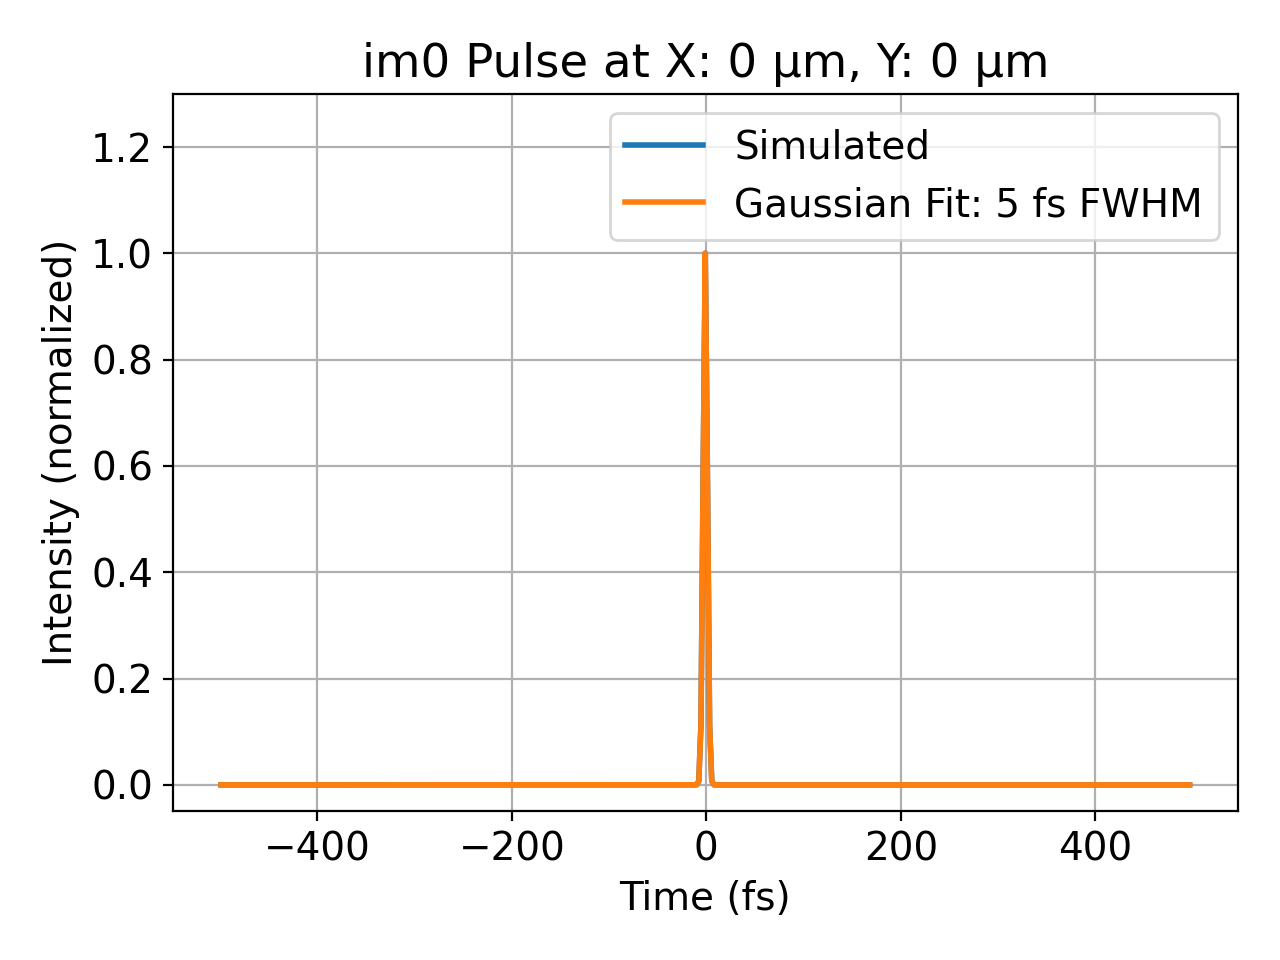

<IPython.core.display.Javascript object>


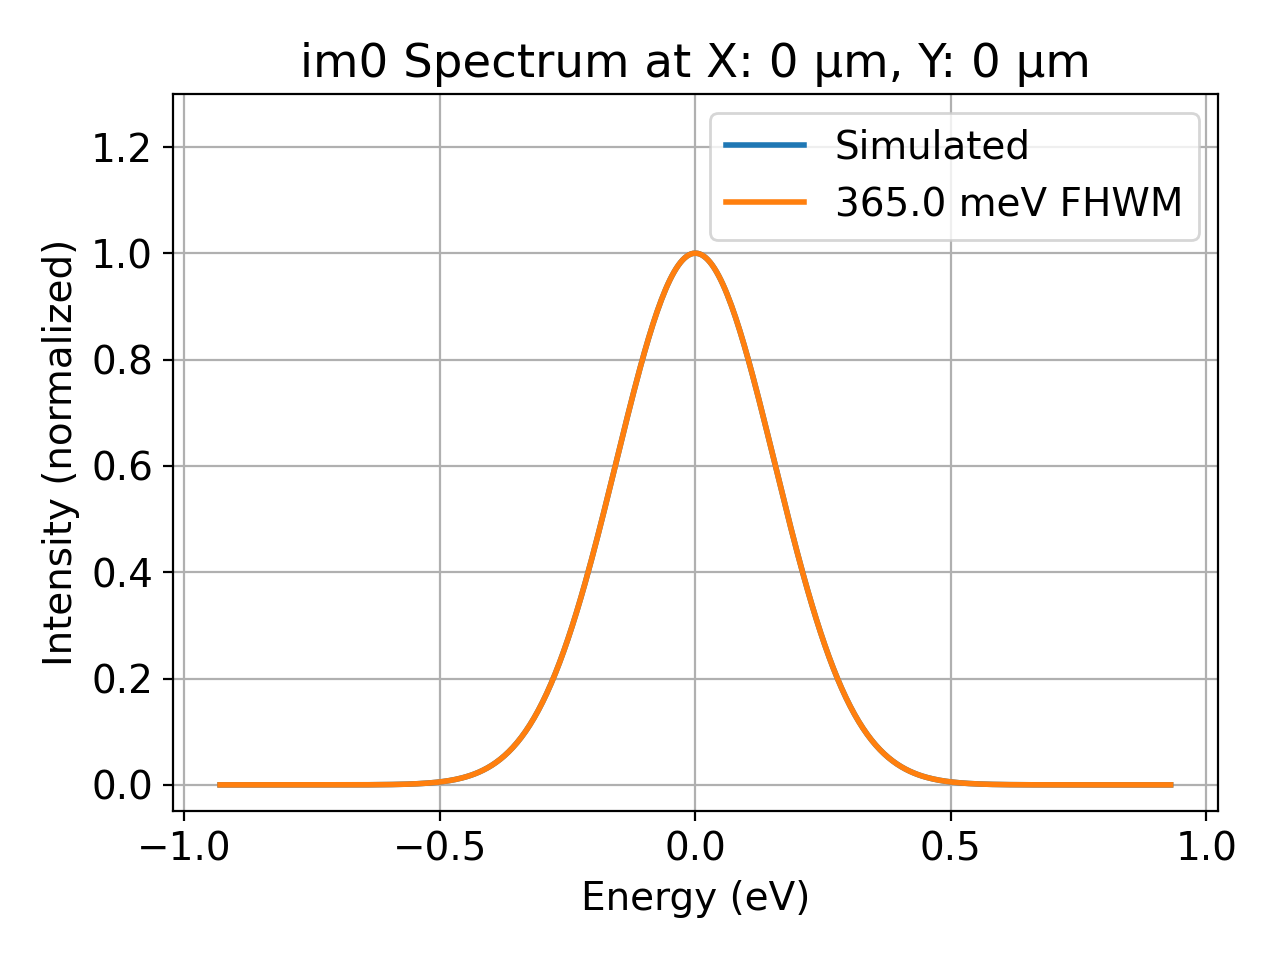

<IPython.core.display.Javascript object>


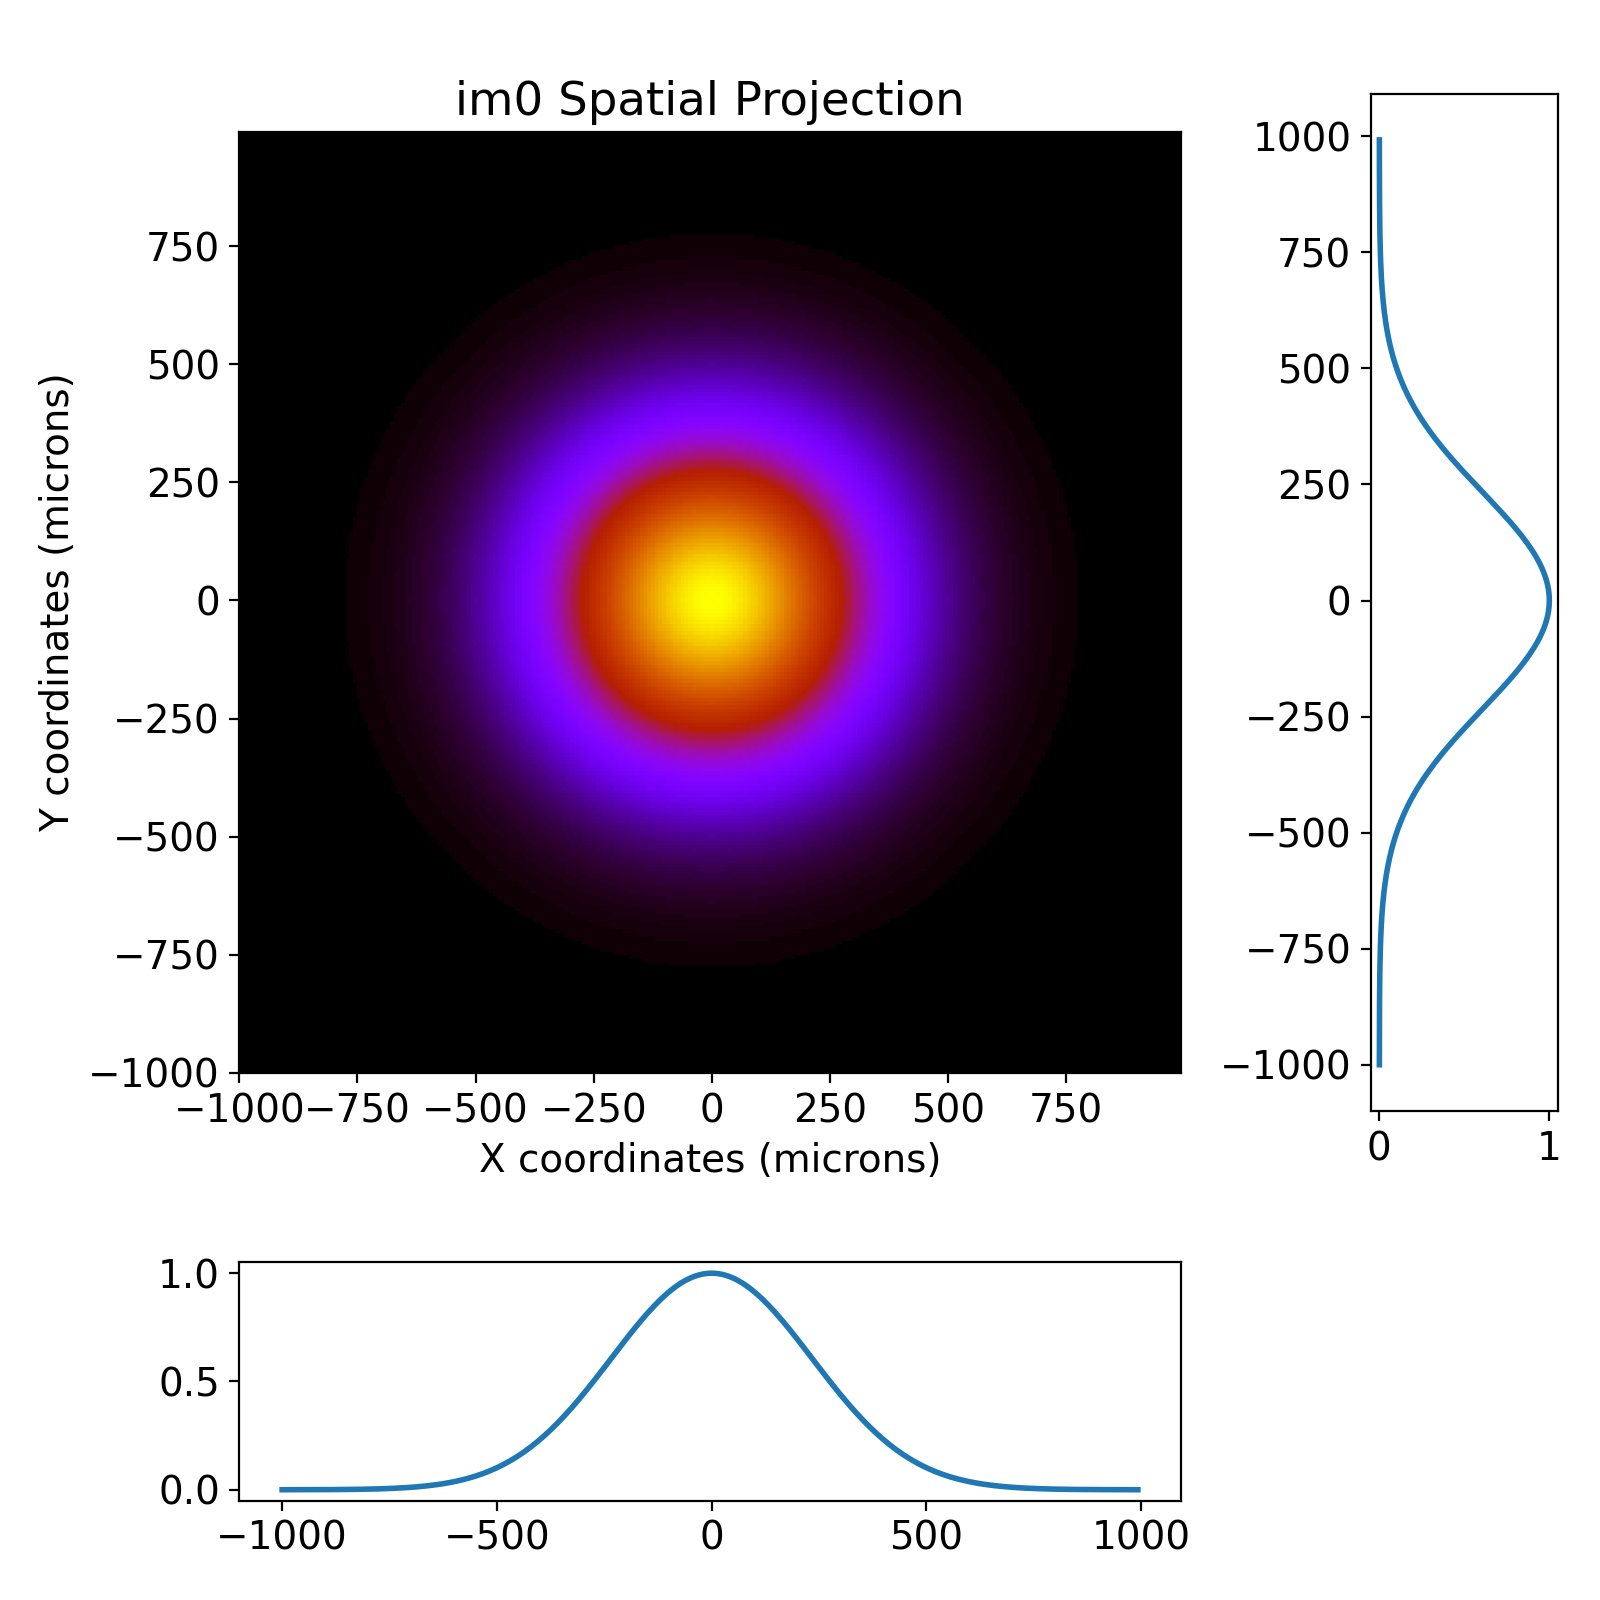

(<matplotlib.axes._subplots.AxesSubplot at 0x12cb1b128>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12e45b4e0>)

In [106]:
# plot input pulse at beam center
pulse.plot_pulse('im0')
# plot input spectrum at beam center
pulse.plot_spectrum('im0')
# plot input beam spatial projection
pulse.imshow_projection('im0')

### Visualize focus properties

<IPython.core.display.Javascript object>


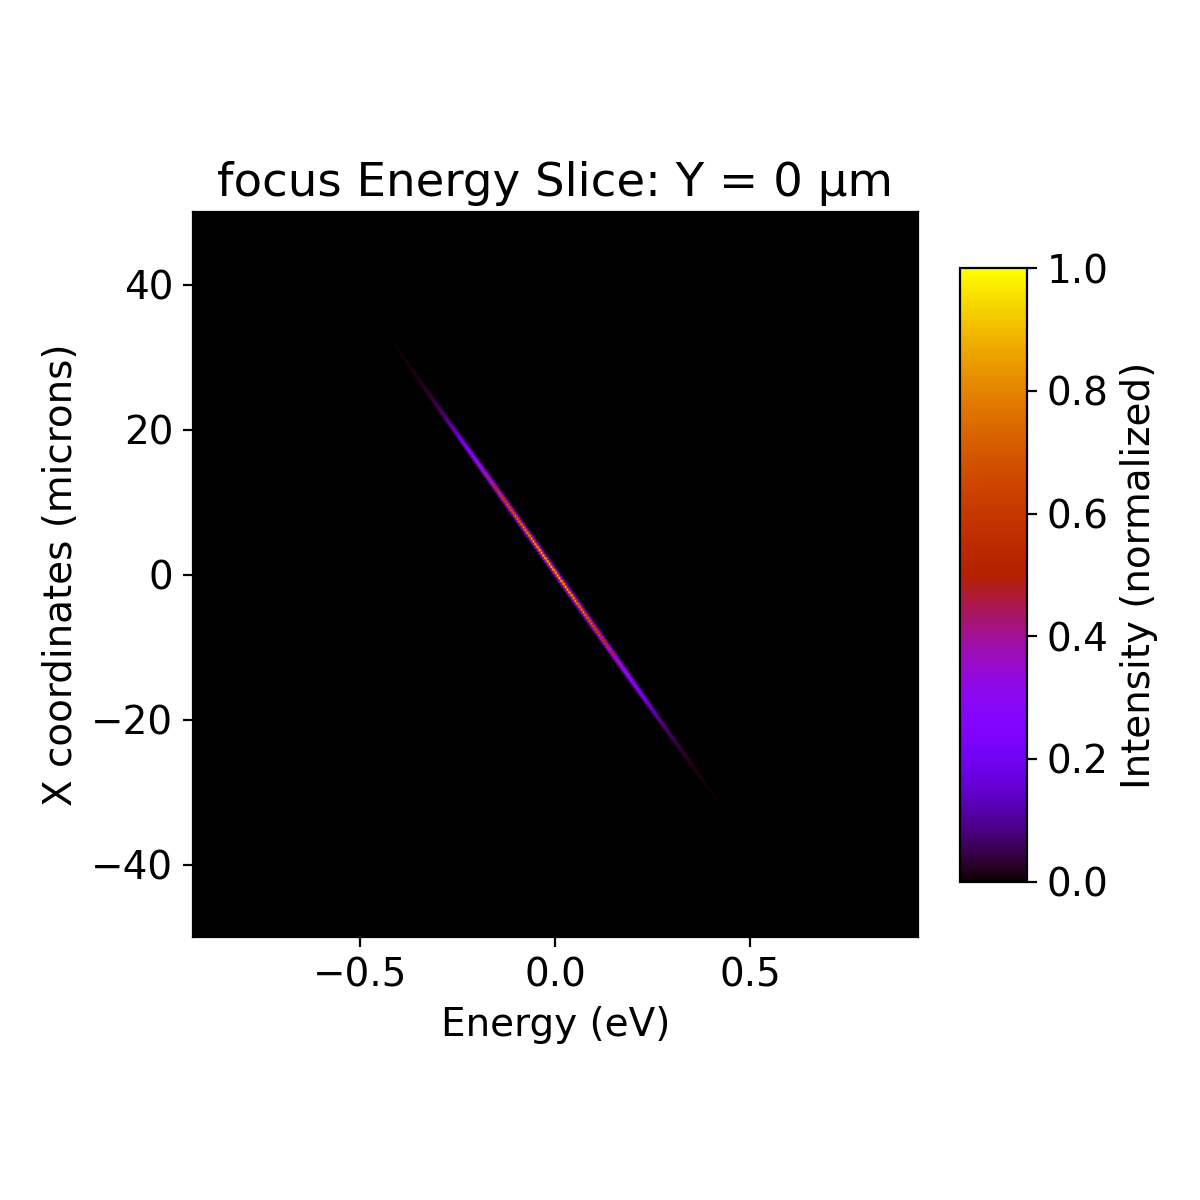

<IPython.core.display.Javascript object>


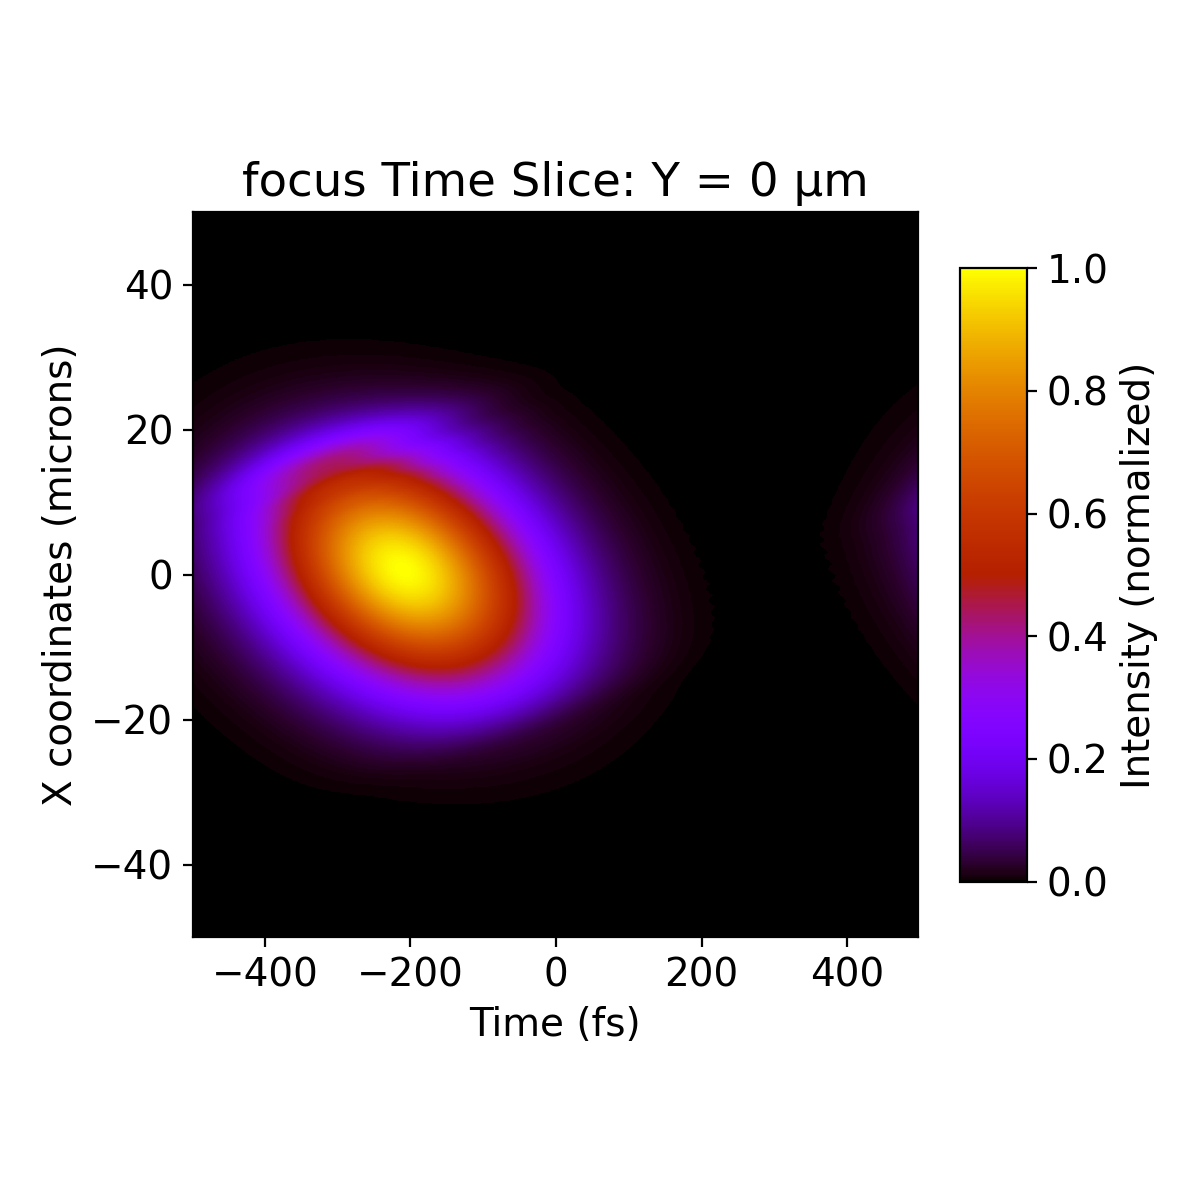

128


<IPython.core.display.Javascript object>


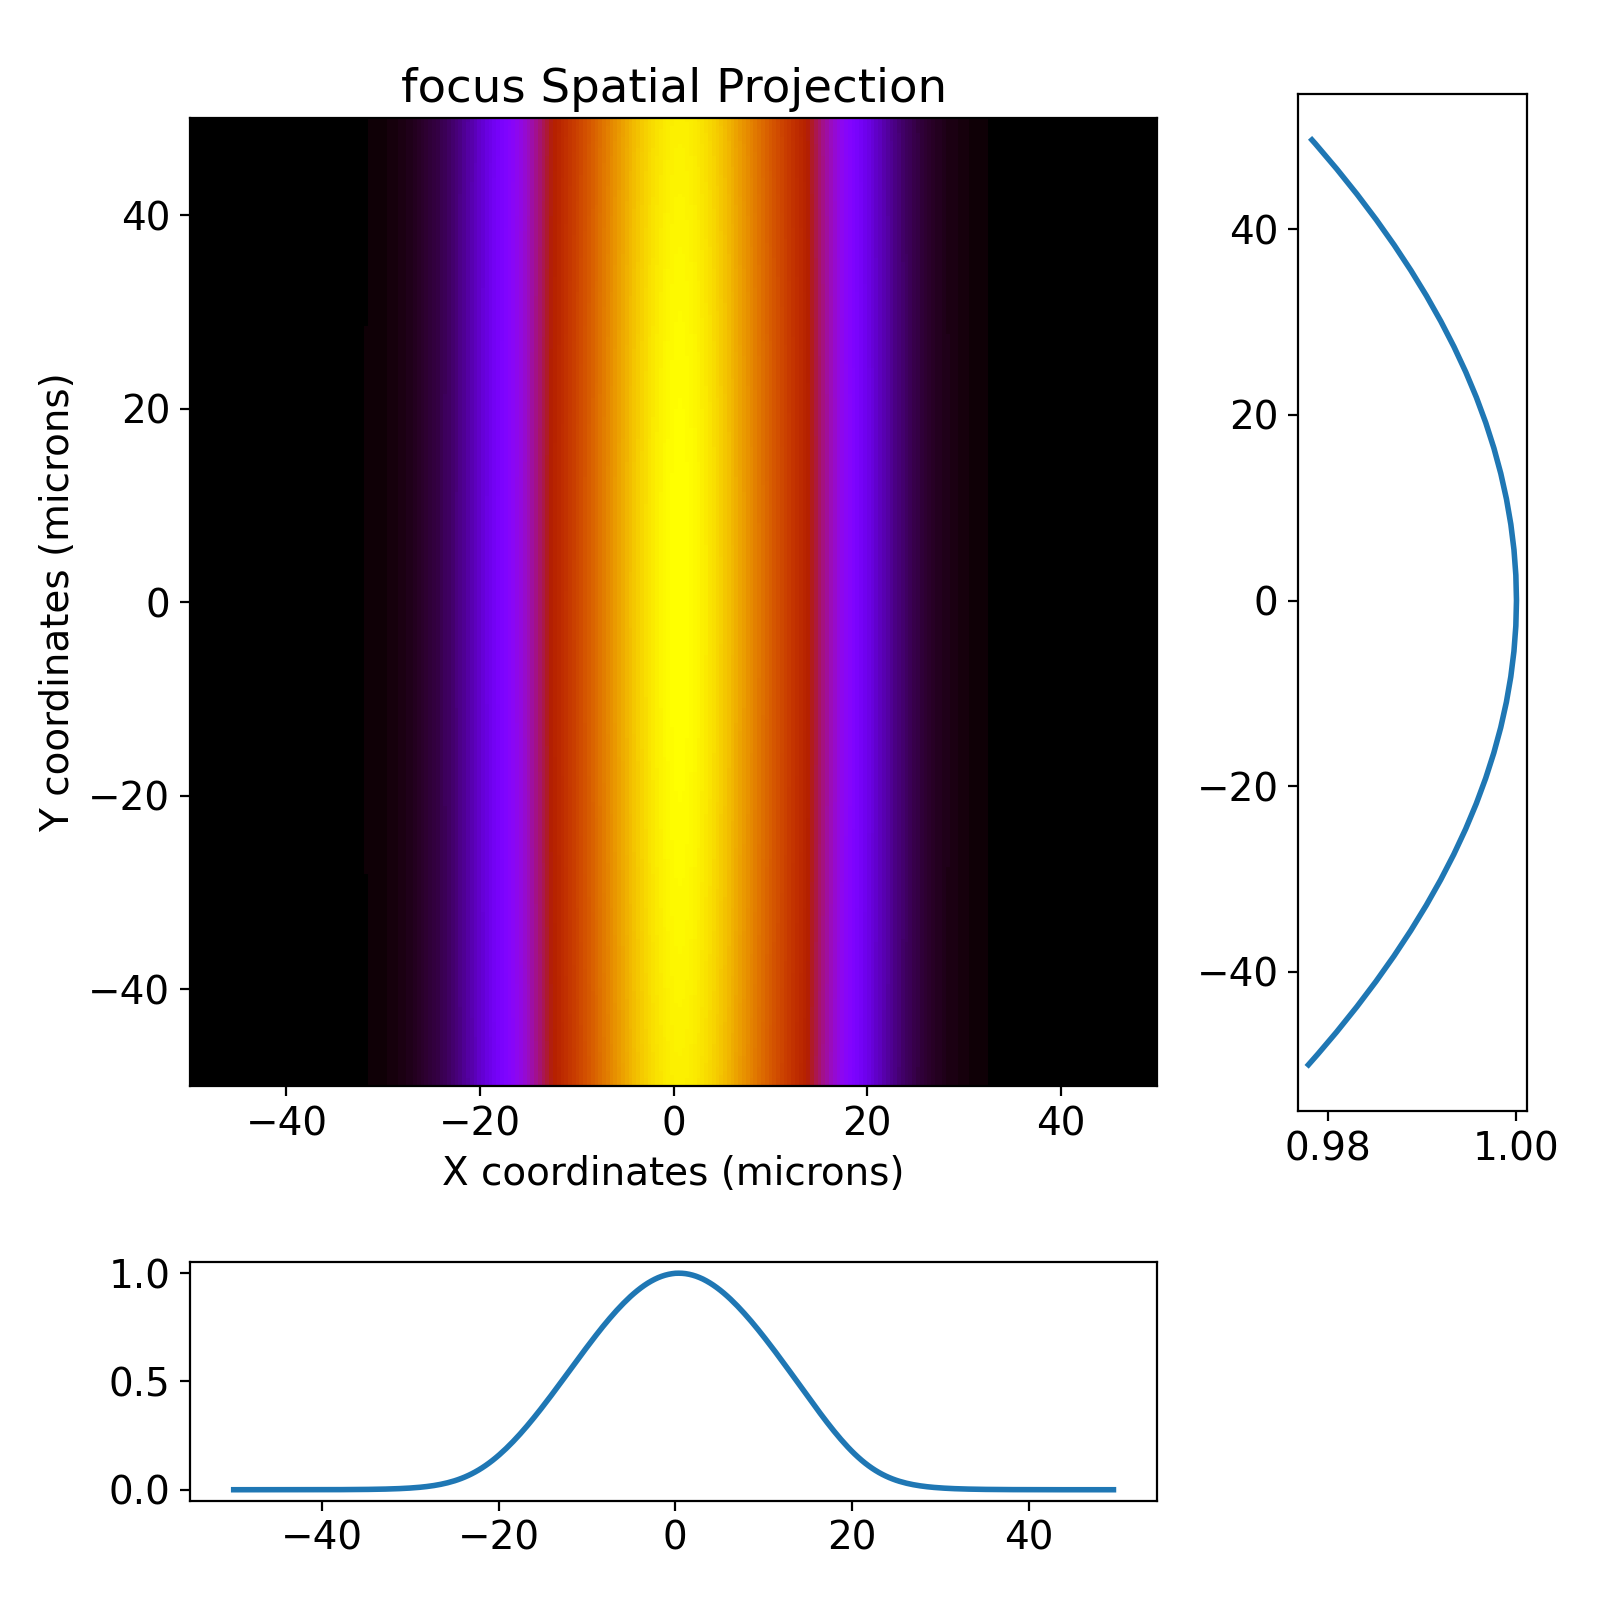

(<matplotlib.axes._subplots.AxesSubplot at 0x12e42e748>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12d6e9ef0>)

In [107]:
# plot energy slice of focus
pulse.imshow_energy_slice('focus')
# plot time slice of focus
pulse.imshow_time_slice('focus')
# show spatial projection
pulse.imshow_projection('focus')

### Visualize output

<IPython.core.display.Javascript object>


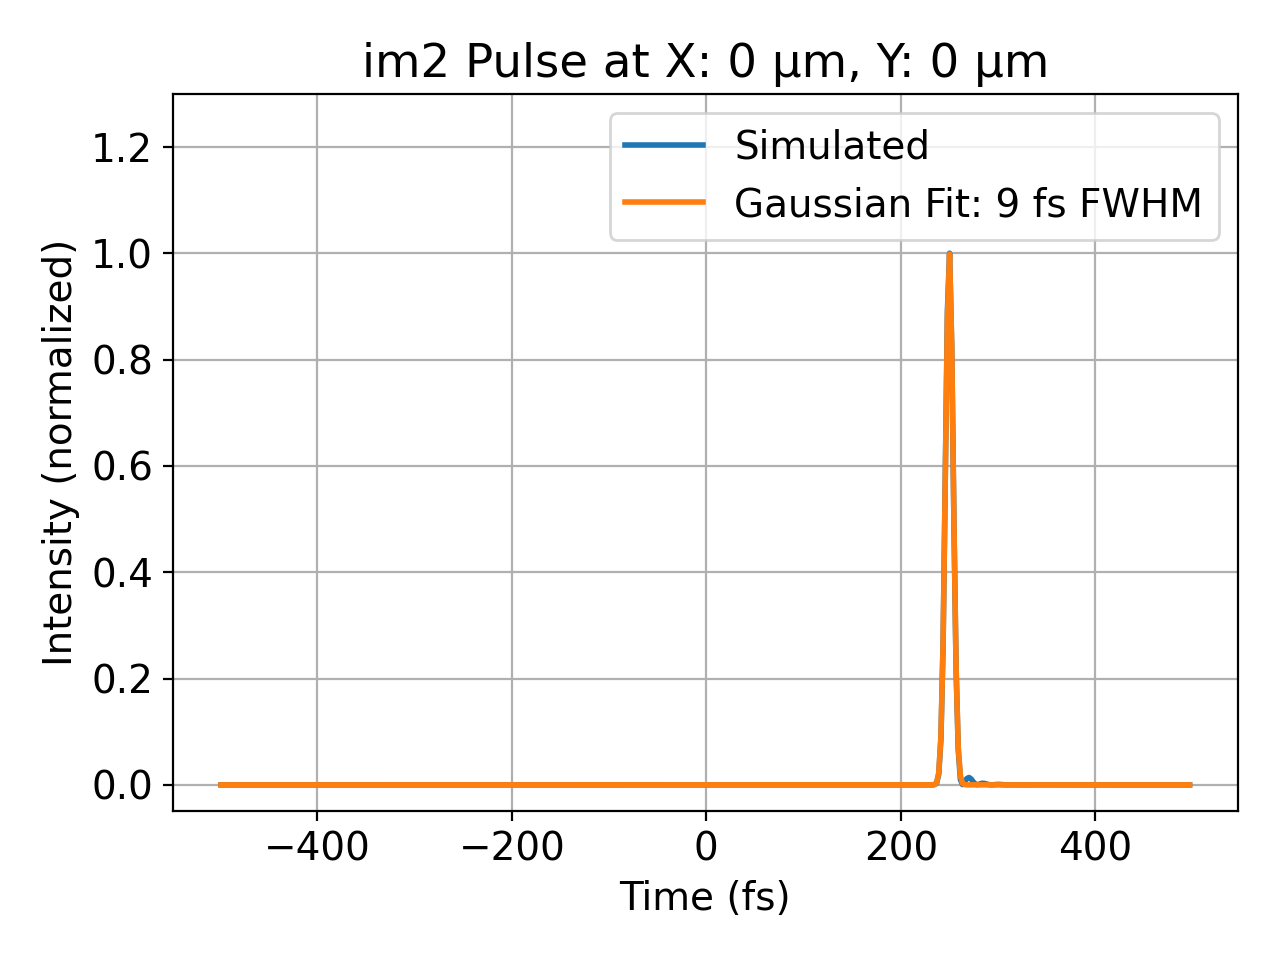

<IPython.core.display.Javascript object>


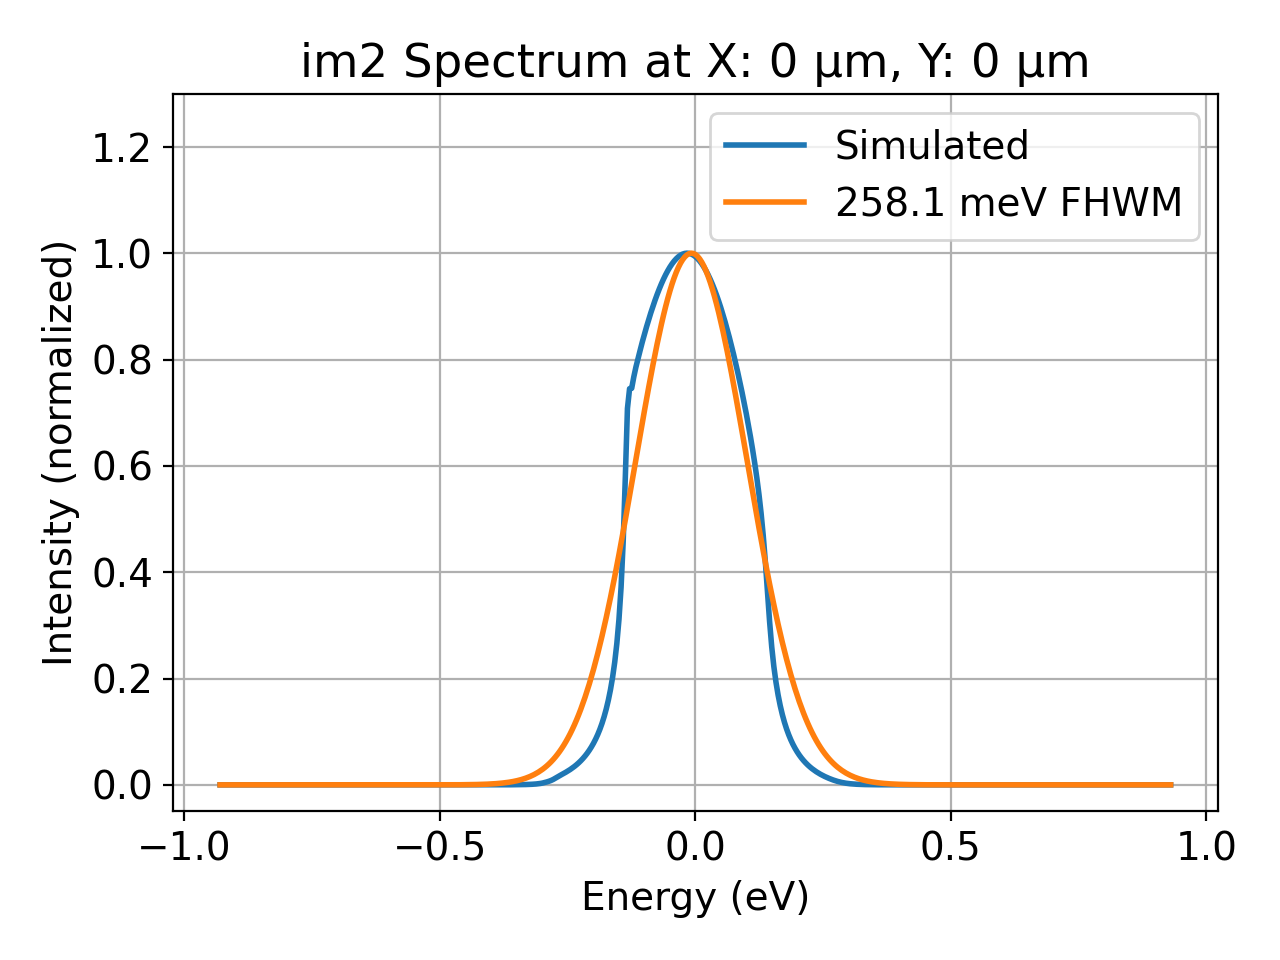

<IPython.core.display.Javascript object>


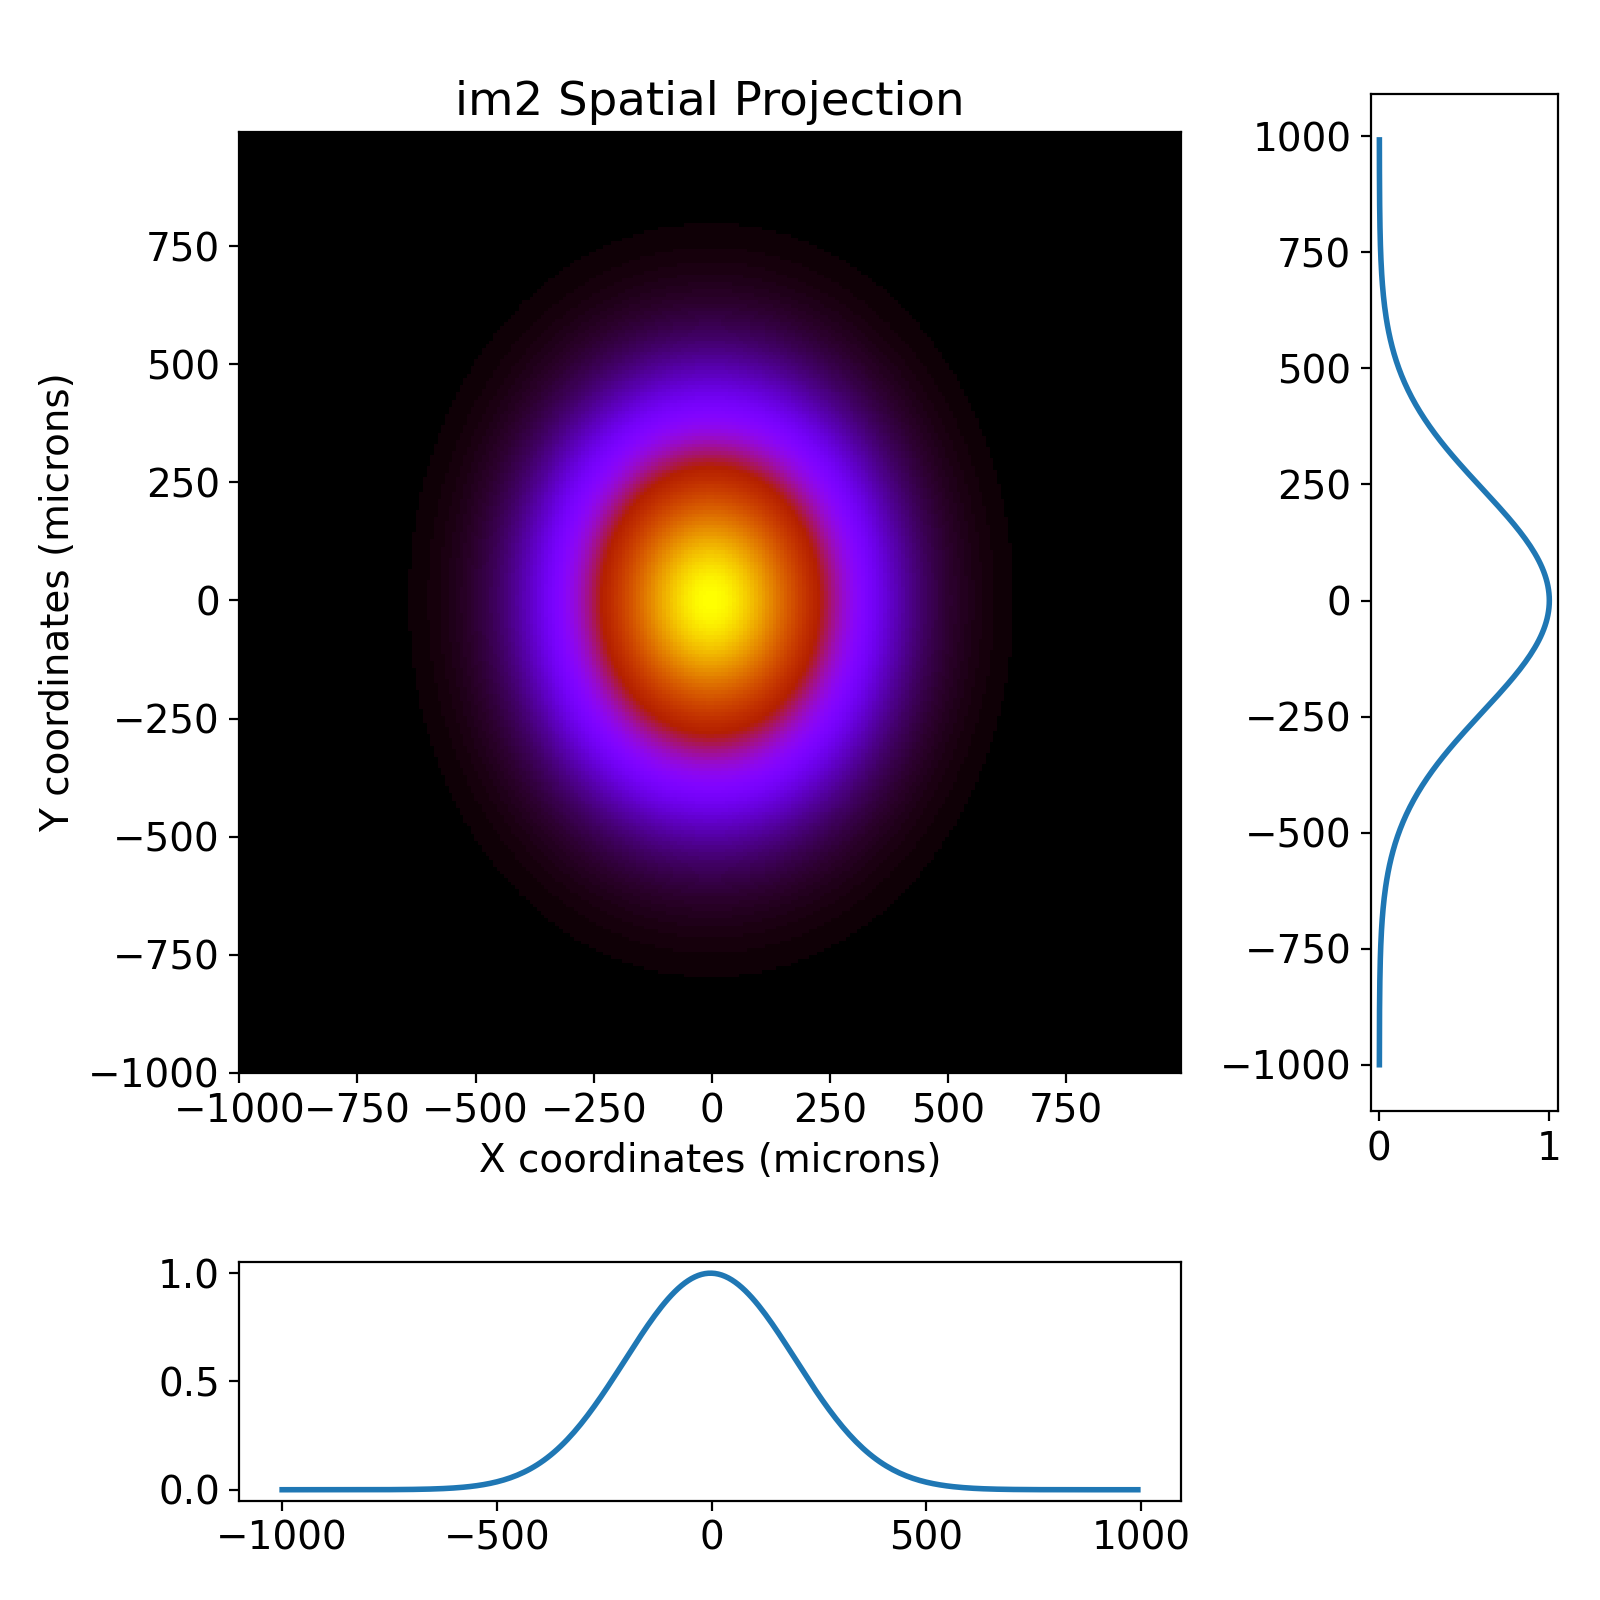

<IPython.core.display.Javascript object>


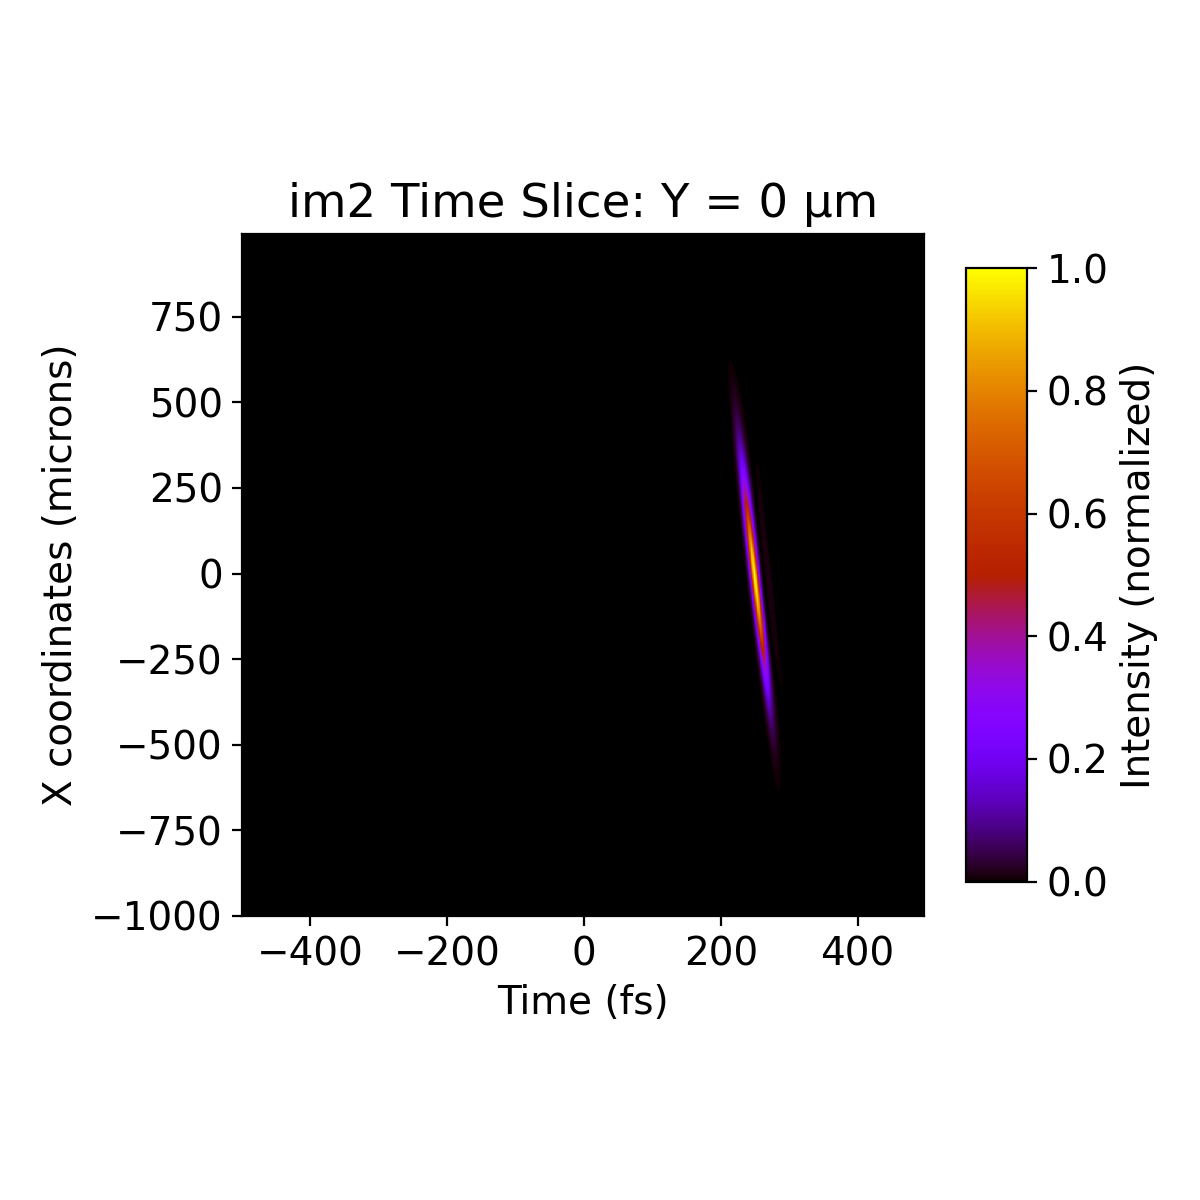

128


<IPython.core.display.Javascript object>


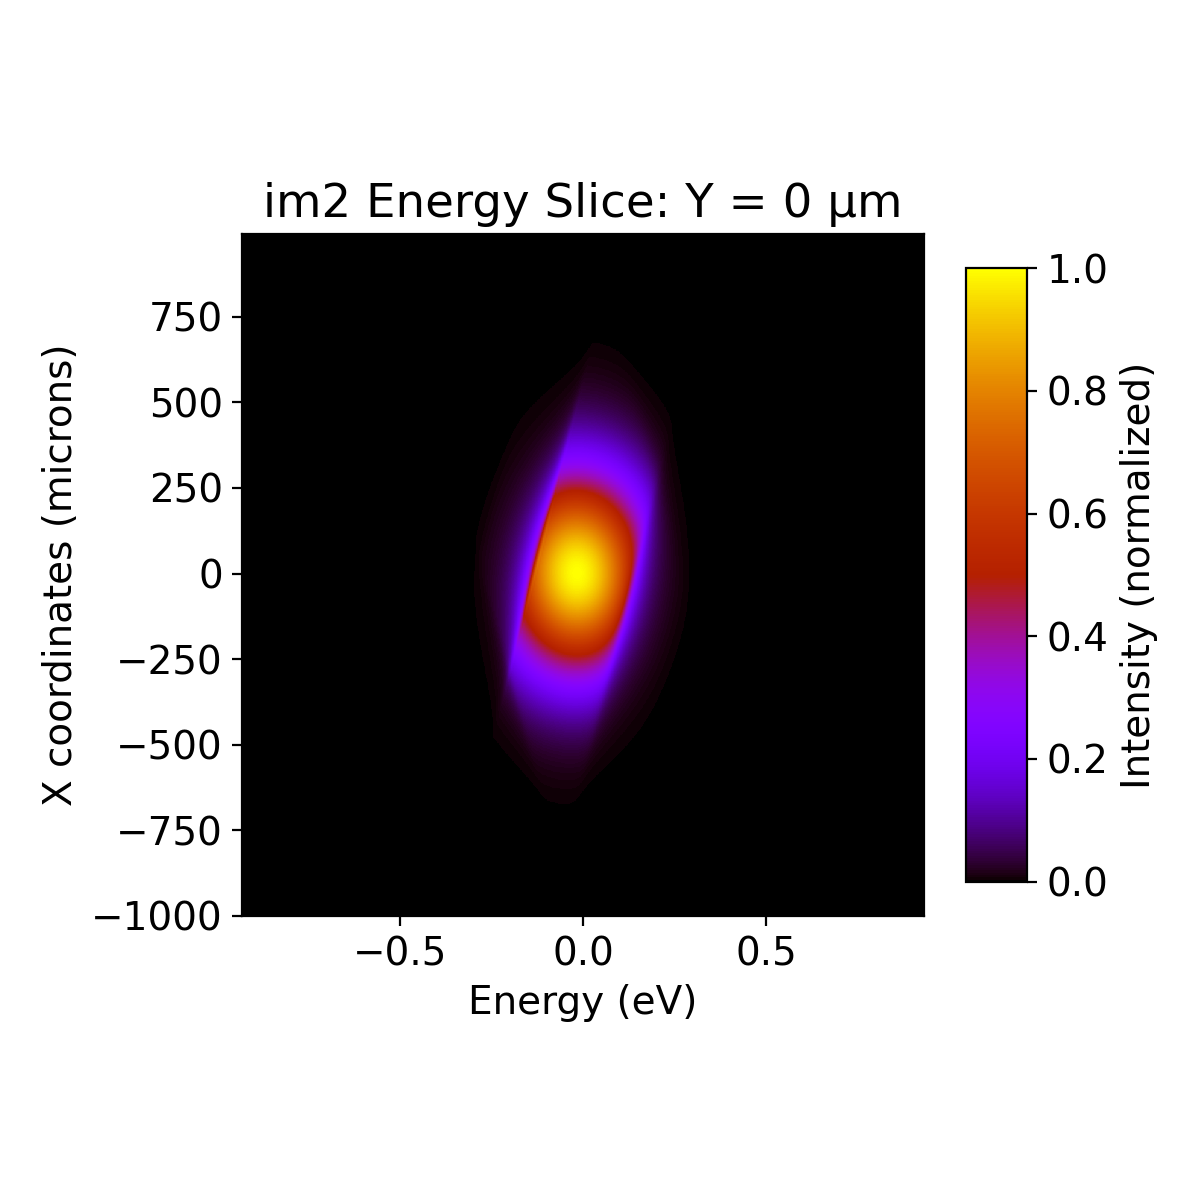

<IPython.core.display.Javascript object>


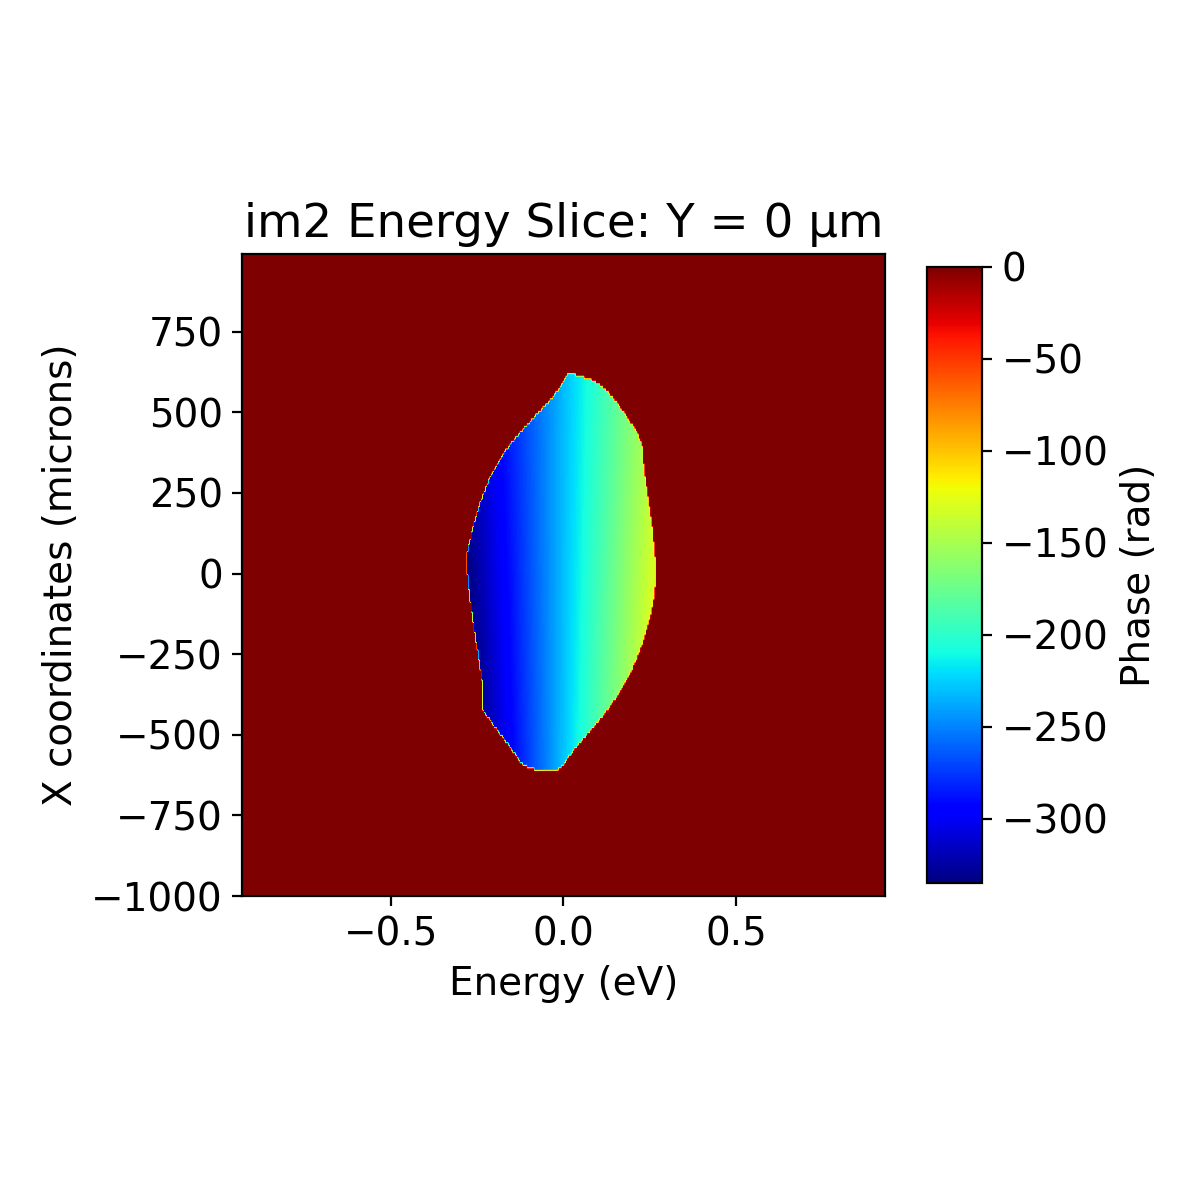

In [108]:
# plot output pulse at beam center
pulse.plot_pulse('im2', shift=0)
# plot output spectraum at beam center
pulse.plot_spectrum('im2')
# show spatial projection of output
pulse.imshow_projection('im2')
# show time slice of output
pulse.imshow_time_slice('im2')
# show energy slice of output
pulse.imshow_energy_slice('im2')
# show spectral phase slice of output
pulse.imshow_energy_slice('im2', image_type='phase')

In [2]:
lambda0 = 1239.8/9000*1e-9
phase = 80
path = phase*lambda0/2/np.pi

In [3]:
print(path)

1.7539582084029499e-09
